# Car Price Prediction



# Dataset preprocessing

In [1]:
import pandas as pd

data = pd.read_csv('C:/Users/EliteBook/Documents/Business Science/Semester 6/Business Application/train-data.csv')
test = pd.read_csv('C:/Users/EliteBook/Documents/Business Science/Semester 6/Business Application/test-data.csv')


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.metrics import (
    
    accuracy_score,
    classification_report,
    confusion_matrix,
    mean_squared_error,
    mean_absolute_error,
)
from lightgbm import LGBMClassifier
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import (
    ExtraTreesRegressor,
    GradientBoostingClassifier,
    GradientBoostingRegressor,
    RandomForestClassifier,
    RandomForestRegressor,
)
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import (
    GradientBoostingRegressor,
    AdaBoostRegressor,
    BaggingRegressor,
    RandomForestRegressor,
)
from sklearn.neural_network import MLPRegressor
import xgboost as xgb


In [4]:
data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [5]:
test.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

Let's drop the 'New_Price' and 'Unnamed:0' columns.

In [6]:
data = data.drop('New_Price', axis=1)
data = data.drop('Unnamed: 0', axis=1)

test = test.drop('New_Price', axis=1)
test = test.drop('Unnamed: 0', axis=1)

And, drop all NaN data.

In [7]:
data = data.dropna(how='any')
test = test.dropna(how='any')

In [8]:
data.shape

(5975, 12)

In [9]:
test.shape

(1223, 11)

For this dataset ưe found one point very interesting for the Name of the vehicle. We noticed that there weren't any rules for vehicle naming, and duting the prediction step, we reconigned that the names of the vehicles in train_data and test_data are very different and not predictable. We check the following:

In [10]:
listtrain = data['Name']
listtest = test['Name']
  
# prints the missing in listrain 
print("Missing values in first list:", (set(listtest).difference(listtrain))) 

Missing values in first list: {'Fiat Punto EVO 1.3 Emotion', 'Mahindra Scorpio VLS 2.2 mHawk', 'Maruti Swift VVT ZXI', 'Honda Amaze VX CVT i-VTEC', 'Chevrolet Enjoy 1.3 TCDi LTZ 7', 'Nissan 370Z AT', 'Bentley Flying Spur W12', 'Tata Tigor 1.2 Revotron XZ Option', 'Maruti Ciaz VDi Option SHVS', 'Hyundai Creta 1.6 SX Automatic', 'Tata Indica Vista Quadrajet LX', 'BMW 7 Series 730Ld DPE Signature', 'Skoda Superb Petrol Ambition', 'Maruti Vitara Brezza ZDi Plus AMT', 'Mercedes-Benz B Class B180 Sport', 'Honda CR-V Diesel', 'Mahindra Scorpio SLX 2.6 Turbo 8 Str', 'Mercedes-Benz E-Class E240 V6 AT', 'Toyota Etios Cross 1.2L G', 'Toyota Etios Liva VD', 'Chevrolet Sail Hatchback 1.2', 'Nissan Terrano XE 85 PS', 'Skoda Laura 1.9 TDI MT Elegance', 'Chevrolet Enjoy 1.4 LTZ 8', 'Hyundai Santro Xing XG AT eRLX Euro III', 'Hyundai Xcent 1.2 CRDi SX', 'Toyota Innova Crysta Touring Sport 2.4 MT', 'BMW 3 Series GT 320d Sport Line', 'Mercedes-Benz E-Class 250 D W 124', 'Honda Amaze E i-DTEC', 'Honda Cit

Therefore, we decided to create a new column under the name "Cars" to distinguish the car make & model. We have noticed that some authors have used the coding of vehicle names by specifying each vehicle as a separate code and conducting train and prediction, which is probably not LOGICAL.

In [11]:
data['Cars'] = data['Name'].str.split(" ").str[0] + ' ' +data['Name'].str.split(" ").str[1]
test['Cars'] = test['Name'].str.split(" ").str[0] + ' ' +test['Name'].str.split(" ").str[1]

In [12]:
set(test['Cars']).issubset(set(data['Cars']))

False

Now, check again, and efectively, there are only 7 cars in the test data set are missing from the train data set. Fine, we drop these items.

In [13]:
listtrain = data['Cars']
listtest = test['Cars']
  
# prints the missing and additional elements in list1 
print("Missing values in first list:", (set(listtest).difference(listtrain))) 

Missing values in first list: {'Fiat Abarth', 'Toyota Land', 'Nissan 370Z', 'Bentley Flying', 'Hindustan Motors', 'OpelCorsa 1.4Gsi', 'Isuzu MU'}


In [14]:
test.drop(test[test['Cars'].isin(['Toyota Land', 'Hindustan Motors', 'Fiat Abarth', 'Nissan 370Z', 
                                  'Isuzu MU', 'Bentley Flying', 'OpelCorsa 1.4Gsi'])].index, inplace = True)

In [15]:
test.shape

(1216, 12)

In [16]:
listtrain = data['Cars']
listtest = test['Cars']
  
# prints the missing and additional elements in list1 
print("Missing values in first list:", (set(listtest).difference(listtrain))) 

Missing values in first list: set()


In [17]:
data.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Cars
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda Jazz


Now, we will convert all data of columns "Mileage", "Engine", "Power", "Seats" into float.

In [18]:
data['Mileage'] = data['Mileage'].str.replace(' kmpl','')
data['Mileage'] = data['Mileage'].str.replace(' km/kg','')
data['Engine'] = data['Engine'].str.replace(' CC','')
data['Power'] = data['Power'].str.replace('null bhp','112')
data['Power'] = data['Power'].str.replace(' bhp','')

test['Mileage'] = test['Mileage'].str.replace(' kmpl','')
test['Mileage'] = test['Mileage'].str.replace(' km/kg','')
test['Engine'] = test['Engine'].str.replace(' CC','')
test['Power'] = test['Power'].str.replace('null bhp','112')
test['Power'] = test['Power'].str.replace(' bhp','')

In [19]:
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Cars                 0
dtype: int64

In [20]:
test.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Cars                 0
dtype: int64

In [21]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
Cars                  object
dtype: object

In [22]:
data['Mileage'] = data['Mileage'].astype(float)
data['Mileage'] = data['Mileage'].astype(float)
data['Engine'] = data['Engine'].astype(float)
data['Power'] = data['Power'].astype(float)

test['Mileage'] = test['Mileage'].astype(float)
test['Mileage'] = test['Mileage'].astype(float)
test['Engine'] = test['Engine'].astype(float)
test['Power'] = test['Power'].astype(float)

In [60]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5975.000000,5.975000e+03,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,18.179408,1621.606695,113.254882,5.278828,1.828577
std,3.247238,9.155851e+04,4.521801,601.036987,53.415632,0.808959,0.872478
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,0.000000,-0.820981
25%,2012.000000,3.390800e+04,15.200000,1198.000000,77.000000,5.000000,1.252763
50%,2014.000000,5.300000e+04,18.160000,1493.000000,98.600000,5.000000,1.731656
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,2.297573
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,5.075174


In [24]:
feature = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
           'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','Price']
data = pd.DataFrame(data, columns=feature)

feature1 = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
            'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']
test = pd.DataFrame(test, columns=feature1)

In [66]:
test

,Cars,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0
1,Maruti Alto,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0
2,Toyota Innova,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0
3,Toyota Etios,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,112.00,5.0
4,Hyundai i20,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0
1230,Volkswagen Polo,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0
1231,Nissan Micra,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0
1232,Volkswagen Polo,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0


In [68]:
data

,Cars,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,0.559616
1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,2.525729
2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,1.504077
3,Maruti Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,1.791759
4,Audi A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,2.875822
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,1.558145
6015,Hyundai Xcent,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,1.386294
6016,Mahindra Xylo,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,1.064711
6017,Maruti Wagon,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,0.974560


# Exploratory data analysis


In [25]:
data.head(3)

,Cars,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50


Now, let's check the Price first.

Skewness: 3.334741
Kurtosis: 17.073183


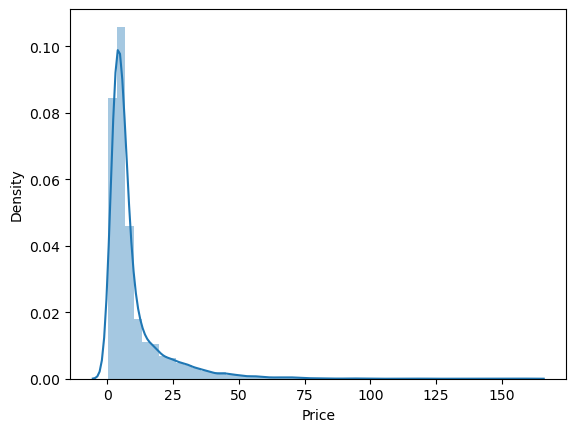

In [26]:
sns.distplot(data['Price'])

print("Skewness: %f" % data['Price'].skew())
print("Kurtosis: %f" % data['Price'].kurt())

We can observe that the distribution of prices shows a high positive skewness to the left (skew > 1). A kurtosis value of 17 is very high, meaning that there is a profusion of outliers in the dataset.

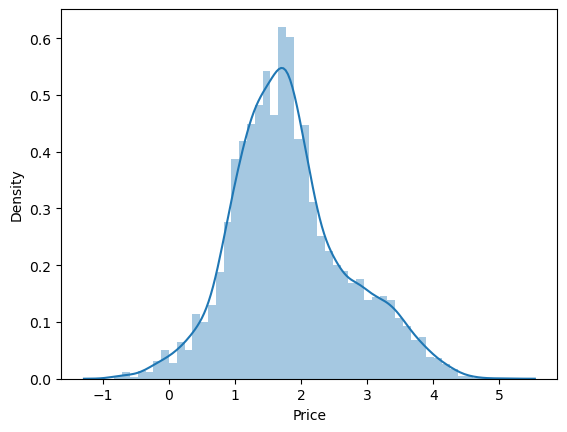

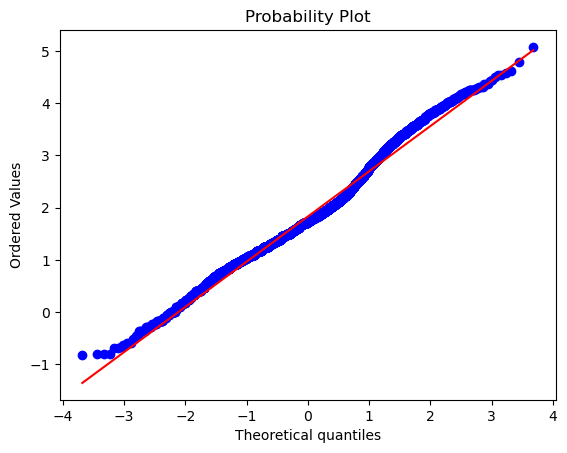

In [27]:
#applying log transformation
data['Price'] = np.log(data['Price'])
#transformed histogram and normal probability plot
#sns.distplot(data['Price']);
sns.distplot(data['Price'], fit=None);
fig = plt.figure()
res = stats.probplot(data['Price'], plot=plt)

We found that converting the value of Price to Log(Price) might be a good solution to have a more normal visualization of the distribution of the Price, however, this alternative has no major or decisive effect on the results of the train and/ or predict procedure in the next section. Therefore, in order not to complicate matters, we decided to keep the whole processed database up to this step to analyze the parameters' correlations and conduct the modeling in the following section.

# Relationship of price with other parameter¶

In [28]:
# Find most important features relative to target Price
print("Find most important features relative to Price-target")
corr = data.corr()
corr.sort_values(["Price"], ascending = False, inplace = True)
print(corr.Price)

Find most important features relative to Price-target
Price                1.000000
Power                0.755995
Engine               0.687712
Year                 0.503999
Seats                0.163818
Kilometers_Driven   -0.047187
Mileage             -0.265965
Name: Price, dtype: float64


# Model



In [38]:
import copy
df_train=copy.deepcopy(data)
df_test=copy.deepcopy(test)

cols=np.array(data.columns[data.dtypes != object])
for i in df_train.columns:
    if i not in cols:
        df_train[i]=df_train[i].map(str)
        df_test[i]=df_test[i].map(str)
df_train.drop(columns=cols,inplace=True)
df_test.drop(columns=np.delete(cols,len(cols)-1),inplace=True)

And then, coding the categorical parameters using LabelEncoder.

In [39]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# build dictionary function
cols=np.array(data.columns[data.dtypes != object])
d = defaultdict(LabelEncoder)

# only for categorical columns apply dictionary by calling fit_transform 
df_train = df_train.apply(lambda x: d[x.name].fit_transform(x))
df_test = df_test.apply(lambda x: d[x.name].transform(x))
df_train[cols] = data[cols]
df_test[np.delete(cols,len(cols)-1)]=test[np.delete(cols,len(cols)-1)]

In [40]:
df_test.head(2)

,Cars,Location,Fuel_Type,Transmission,Owner_Type,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
0,106,4,0,1,0,2014,40929,32.26,998.0,58.2,4.0
1,106,3,3,1,2,2013,54493,24.70,796.0,47.3,5.0


In [41]:
df_train.head(2)

,Cars,Location,Fuel_Type,Transmission,Owner_Type,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,124,9,0,1,0,2010,72000,26.60,998.0,58.16,5.0,0.559616
1,65,10,1,1,0,2015,41000,19.67,1582.0,126.20,5.0,2.525729


In [67]:
# Save the first two rows of df_test to CSV
df_test.to_csv('clean_test.csv', index=False)

# Save the first two rows of df_train to CSV
df_train.to_csv('clean_train.csv', index=False)

print('Saved clean_test.csv and clean_train.csv')


Saved clean_test.csv and clean_train.csv


**Training and Testing**

We split our dataset into training, testing data with a 70:30 split ratio. The splitting was done by picking at random which results in a balance between the training data and testing data amongst the whole dataset. This is done to avoid overfitting and enhance generalization. Finaly, we selected 11 characters in the dataset to train the model.

In [42]:
ftrain = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
          'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','Price']

def Definedata():
    # define dataset
    data2 = df_train[ftrain]
    X = data2.drop(columns=['Price']).values
    y0 = data2['Price'].values
    lab_enc = preprocessing.LabelEncoder()
    y = lab_enc.fit_transform(y0)
    return X, y

Now, we create different functions to calculate deviations, important features and graphical illustration.

In [43]:
def Models(models):
    
    model = models
    X, y = Definedata()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)
    
    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Accuracy on Traing set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    return y_total, y

def Featureimportances(models):
    model = models
    model.fit(X_train,y_train)
    importances = model.feature_importances_
    features = df_test.columns[:9]
    imp = pd.DataFrame({'Features': ftest, 'Importance': importances})
    imp['Sum Importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by = 'Importance')
    return imp

def Graph_prediction(n, y_actual, y_predicted):
    y = y_actual
    y_total = y_predicted
    number = n
    aa=[x for x in range(number)]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, y[:number], marker='.', label="actual")
    plt.plot(aa, y_total[:number], 'b', label="prediction")
    plt.xlabel('Price prediction of first {} used cars'.format(number), size=15)
    plt.legend(fontsize=15)
    plt.show()

Firstly, take a quick look at the correlation matrix.

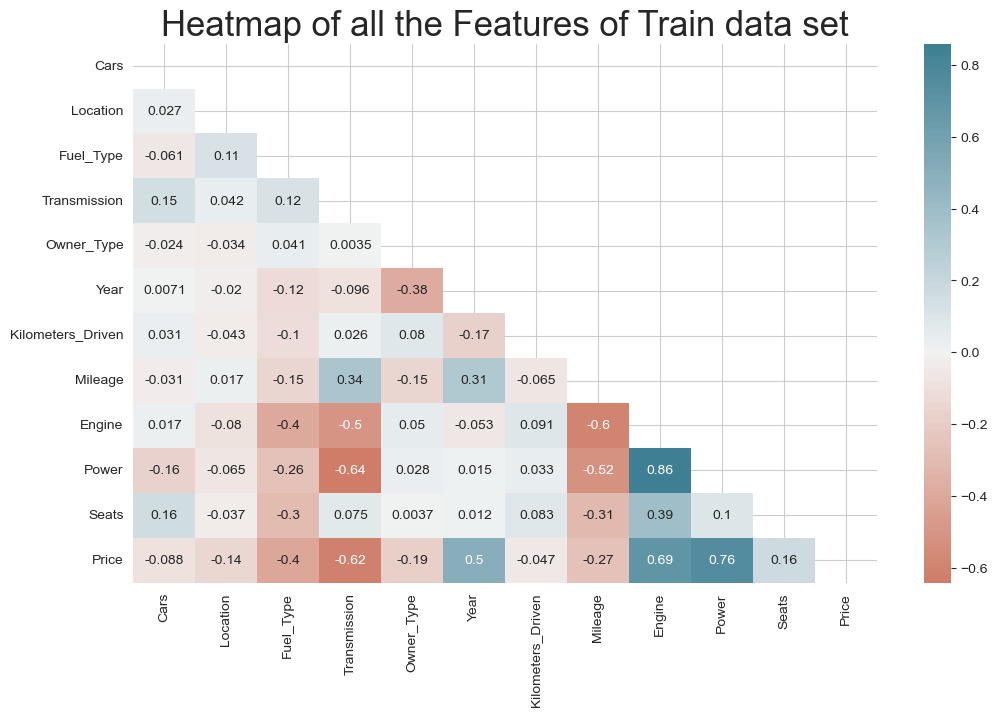

In [44]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))
## Plotting heatmap. # Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_train.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

**Models comparison**

The model score is the coefficient of determination R2 of the prediction. In total, we have examinated 9 models to train/predict the used cars price.

In [45]:
Acc = pd.DataFrame(index=None, columns=['model','Root Mean Squared  Error','Accuracy on Traing set','Accuracy on Testing set'])

In [46]:
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor


In [47]:
X, y = Definedata()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    
regressors = [['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['XGBRegressor', XGBRegressor()],
              ['RandomForestRegressor', RandomForestRegressor()],
              ['MLPRegressor',MLPRegressor()],
              ['AdaBoostRegressor',AdaBoostRegressor()],
              ['ExtraTreesRegressor',ExtraTreesRegressor()]]

for mod in regressors:
    name = mod[0]
    model = mod[1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    ATrS =  model.score(X_train,y_train)
    ATeS = model.score(X_test,y_test)
    
    Acc = Acc.append(pd.Series({'model':name, 'Root Mean Squared  Error': RMSE,'Accuracy on Traing set':ATrS,'Accuracy on Testing set':ATeS}),ignore_index=True )

In [48]:
Acc.sort_values(by='Accuracy on Testing set')

,model,Root Mean Squared Error,Accuracy on Traing set,Accuracy on Testing set
3,MLPRegressor,526.544117,0.472307,-1.308863
4,AdaBoostRegressor,152.063524,0.820638,0.807434
0,DecisionTreeRegressor,114.693572,0.999993,0.890451
2,RandomForestRegressor,83.259305,0.991744,0.942271
5,ExtraTreesRegressor,79.998648,0.999993,0.946704
1,XGBRegressor,73.528958,0.994569,0.954976


		Error Table
Mean Absolute Error      :  56.009241974999576
Mean Squared  Error      :  6247.307800480608
Root Mean Squared  Error :  79.03991270542123
Accuracy on Traing set   :  0.9926515439067646
Accuracy on Testing set  :  0.9479738598730314


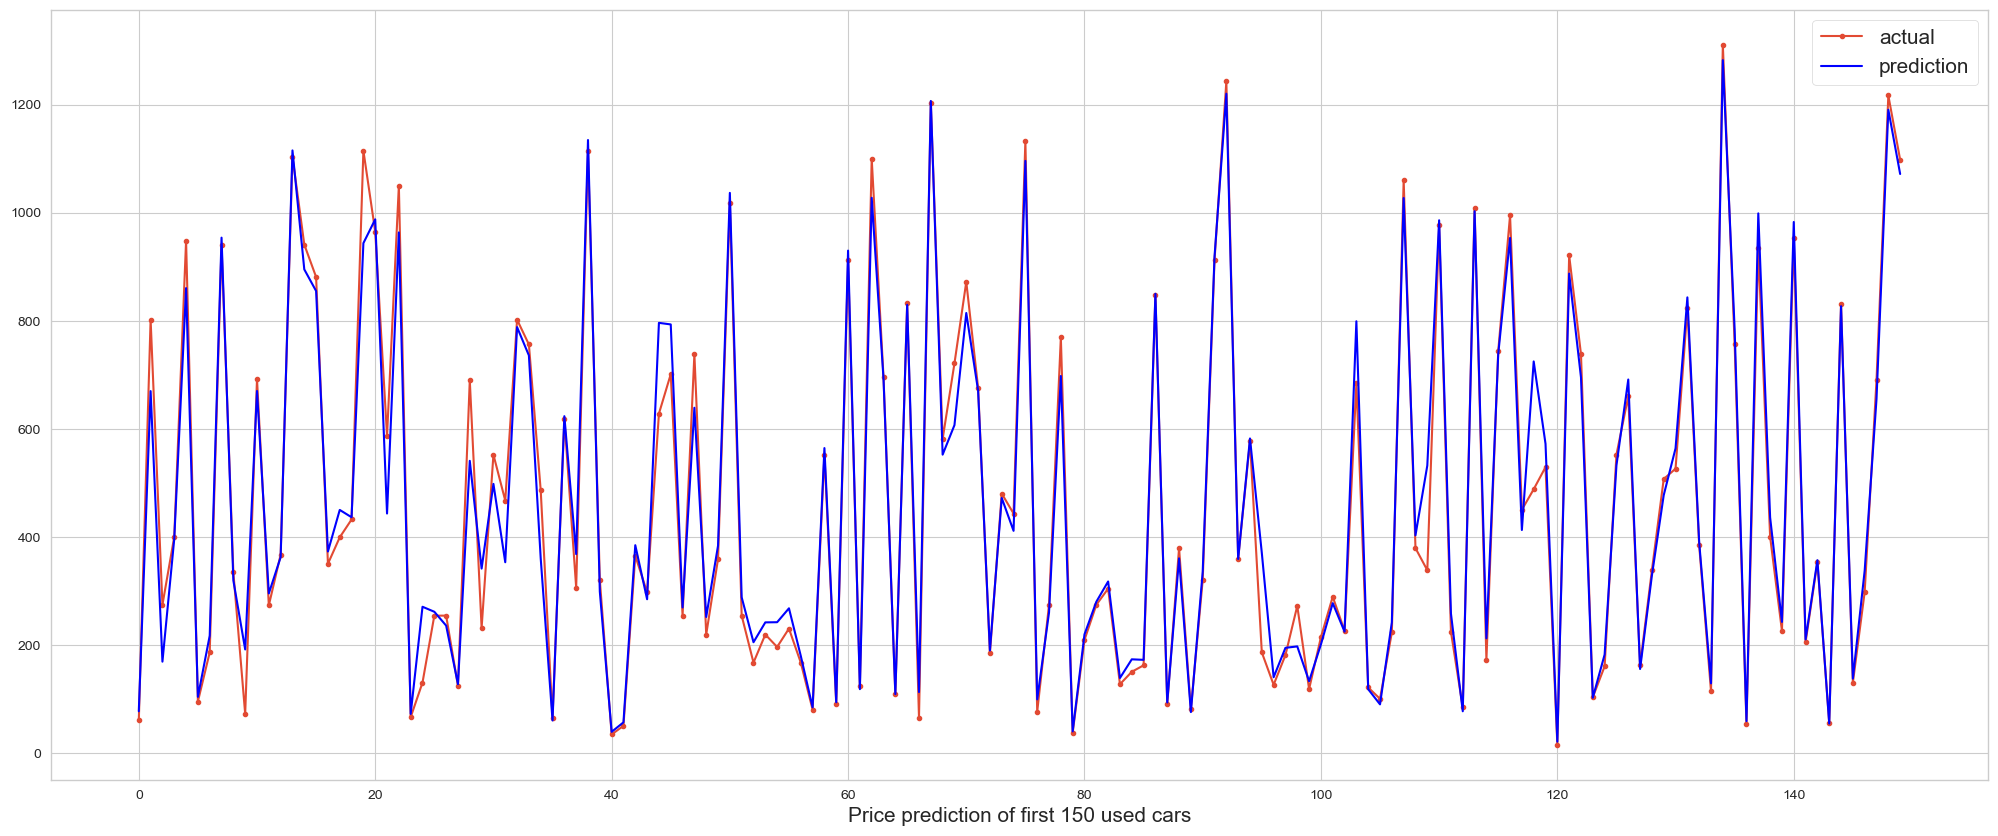

In [49]:
y_predicted, y_actual = Models(RandomForestRegressor(n_estimators=10000,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=25))
Graph_prediction(150, y_actual, y_predicted)

		Error Table
Mean Absolute Error      :  47.05285207381301
Mean Squared  Error      :  4775.906080512007
Root Mean Squared  Error :  69.10793066292759
Accuracy on Traing set   :  0.9947381034525249
Accuracy on Testing set  :  0.9602273544199561


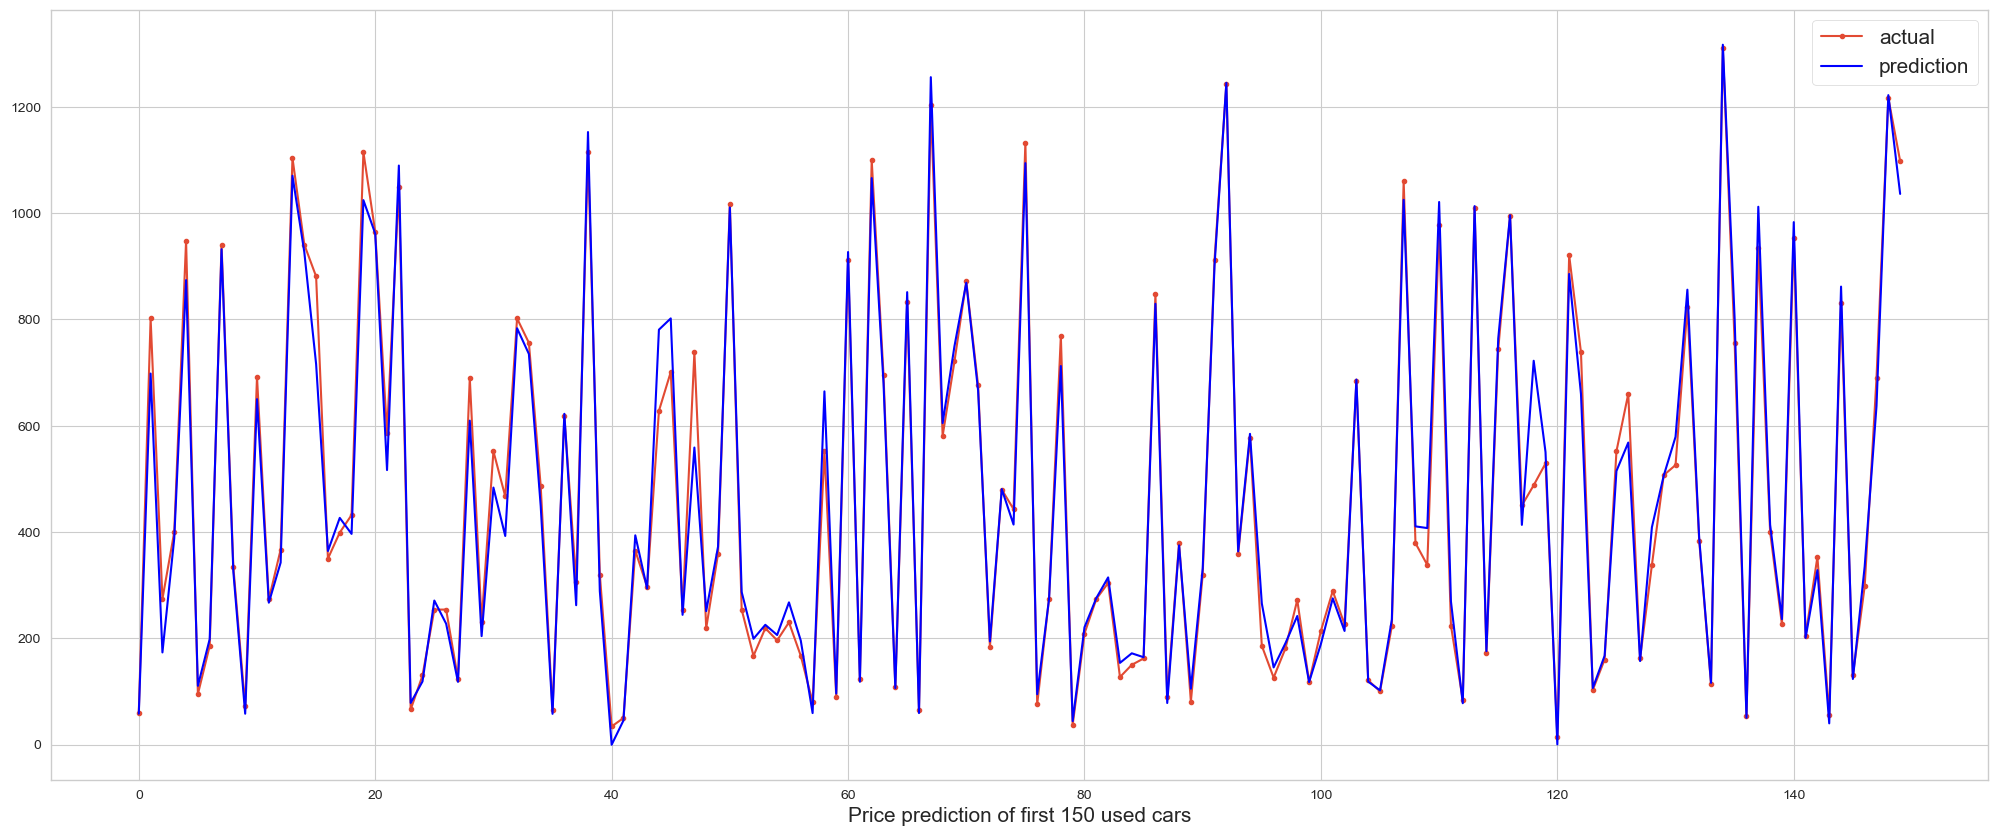

In [50]:
y_predicted, y_actual = Models(GradientBoostingRegressor(random_state=21, n_estimators=3000))
Graph_prediction(150, y_actual, y_predicted)

In [51]:
y_predicted, y_actual = Models(CatBoostRegressor(iterations= 10000, learning_rate= 0.02, random_state= 60))

0:	learn: 345.6209555	total: 154ms	remaining: 25m 36s
1:	learn: 340.5798029	total: 158ms	remaining: 13m 9s
2:	learn: 335.4172116	total: 161ms	remaining: 8m 58s
3:	learn: 330.4256615	total: 165ms	remaining: 6m 52s
4:	learn: 325.3055417	total: 168ms	remaining: 5m 35s
5:	learn: 320.2643598	total: 170ms	remaining: 4m 43s
6:	learn: 315.4987069	total: 173ms	remaining: 4m 6s
7:	learn: 310.9374902	total: 175ms	remaining: 3m 38s
8:	learn: 306.3487714	total: 177ms	remaining: 3m 16s
9:	learn: 301.8586451	total: 179ms	remaining: 2m 58s
10:	learn: 297.4062292	total: 181ms	remaining: 2m 44s
11:	learn: 293.1492281	total: 183ms	remaining: 2m 32s
12:	learn: 288.9032681	total: 185ms	remaining: 2m 21s
13:	learn: 284.6983842	total: 187ms	remaining: 2m 13s
14:	learn: 280.7840875	total: 189ms	remaining: 2m 5s
15:	learn: 276.8911780	total: 191ms	remaining: 1m 58s
16:	learn: 272.8694885	total: 192ms	remaining: 1m 53s
17:	learn: 269.0154973	total: 194ms	remaining: 1m 47s
18:	learn: 265.4211213	total: 196ms	rem

188:	learn: 98.1780115	total: 543ms	remaining: 28.2s
189:	learn: 98.0166816	total: 546ms	remaining: 28.2s
190:	learn: 97.8745816	total: 548ms	remaining: 28.1s
191:	learn: 97.7096224	total: 550ms	remaining: 28.1s
192:	learn: 97.5369678	total: 552ms	remaining: 28.1s
193:	learn: 97.4224155	total: 555ms	remaining: 28s
194:	learn: 97.2962535	total: 557ms	remaining: 28s
195:	learn: 97.1717534	total: 559ms	remaining: 28s
196:	learn: 97.0442637	total: 563ms	remaining: 28s
197:	learn: 96.9349501	total: 567ms	remaining: 28.1s
198:	learn: 96.8131016	total: 570ms	remaining: 28.1s
199:	learn: 96.6923784	total: 572ms	remaining: 28s
200:	learn: 96.5312041	total: 574ms	remaining: 28s
201:	learn: 96.4192353	total: 577ms	remaining: 28s
202:	learn: 96.3131850	total: 579ms	remaining: 27.9s
203:	learn: 96.1987935	total: 581ms	remaining: 27.9s
204:	learn: 96.0966917	total: 584ms	remaining: 27.9s
205:	learn: 95.9992484	total: 586ms	remaining: 27.9s
206:	learn: 95.8958414	total: 588ms	remaining: 27.8s
207:	le

378:	learn: 83.0245701	total: 926ms	remaining: 23.5s
379:	learn: 82.9697354	total: 929ms	remaining: 23.5s
380:	learn: 82.9420083	total: 932ms	remaining: 23.5s
381:	learn: 82.9043315	total: 935ms	remaining: 23.5s
382:	learn: 82.8472908	total: 943ms	remaining: 23.7s
383:	learn: 82.7996704	total: 947ms	remaining: 23.7s
384:	learn: 82.7280307	total: 949ms	remaining: 23.7s
385:	learn: 82.6566321	total: 951ms	remaining: 23.7s
386:	learn: 82.5918246	total: 953ms	remaining: 23.7s
387:	learn: 82.5081432	total: 955ms	remaining: 23.7s
388:	learn: 82.4106232	total: 957ms	remaining: 23.7s
389:	learn: 82.3089668	total: 959ms	remaining: 23.6s
390:	learn: 82.2688259	total: 961ms	remaining: 23.6s
391:	learn: 82.2223175	total: 963ms	remaining: 23.6s
392:	learn: 82.1697775	total: 965ms	remaining: 23.6s
393:	learn: 82.0967909	total: 967ms	remaining: 23.6s
394:	learn: 82.0371786	total: 969ms	remaining: 23.6s
395:	learn: 81.9833331	total: 973ms	remaining: 23.6s
396:	learn: 81.9353705	total: 975ms	remaining:

564:	learn: 73.3140197	total: 1.31s	remaining: 21.9s
565:	learn: 73.2736286	total: 1.31s	remaining: 21.9s
566:	learn: 73.2422358	total: 1.31s	remaining: 21.9s
567:	learn: 73.2168364	total: 1.32s	remaining: 21.9s
568:	learn: 73.1754323	total: 1.32s	remaining: 21.9s
569:	learn: 73.1277297	total: 1.32s	remaining: 21.9s
570:	learn: 73.0908060	total: 1.32s	remaining: 21.8s
571:	learn: 73.0620676	total: 1.32s	remaining: 21.8s
572:	learn: 73.0334324	total: 1.33s	remaining: 21.9s
573:	learn: 73.0011536	total: 1.33s	remaining: 21.8s
574:	learn: 72.9562805	total: 1.33s	remaining: 21.8s
575:	learn: 72.9174261	total: 1.33s	remaining: 21.8s
576:	learn: 72.8815217	total: 1.33s	remaining: 21.8s
577:	learn: 72.8354773	total: 1.34s	remaining: 21.8s
578:	learn: 72.7962875	total: 1.34s	remaining: 21.8s
579:	learn: 72.7462166	total: 1.34s	remaining: 21.8s
580:	learn: 72.6772583	total: 1.34s	remaining: 21.8s
581:	learn: 72.6444263	total: 1.35s	remaining: 21.8s
582:	learn: 72.6037254	total: 1.35s	remaining:

754:	learn: 66.3741427	total: 1.69s	remaining: 20.7s
755:	learn: 66.3426409	total: 1.7s	remaining: 20.8s
756:	learn: 66.3175736	total: 1.7s	remaining: 20.8s
757:	learn: 66.2914660	total: 1.7s	remaining: 20.8s
758:	learn: 66.2632486	total: 1.7s	remaining: 20.8s
759:	learn: 66.2422797	total: 1.71s	remaining: 20.7s
760:	learn: 66.2161562	total: 1.71s	remaining: 20.7s
761:	learn: 66.1915709	total: 1.71s	remaining: 20.7s
762:	learn: 66.1561430	total: 1.71s	remaining: 20.7s
763:	learn: 66.1205202	total: 1.72s	remaining: 20.7s
764:	learn: 66.0797567	total: 1.72s	remaining: 20.7s
765:	learn: 66.0476582	total: 1.72s	remaining: 20.7s
766:	learn: 66.0018394	total: 1.72s	remaining: 20.7s
767:	learn: 65.9778609	total: 1.72s	remaining: 20.7s
768:	learn: 65.9484276	total: 1.73s	remaining: 20.7s
769:	learn: 65.9299888	total: 1.73s	remaining: 20.7s
770:	learn: 65.8853661	total: 1.73s	remaining: 20.7s
771:	learn: 65.8639633	total: 1.73s	remaining: 20.7s
772:	learn: 65.8336392	total: 1.73s	remaining: 20.

954:	learn: 61.3917473	total: 2.08s	remaining: 19.7s
955:	learn: 61.3682940	total: 2.08s	remaining: 19.7s
956:	learn: 61.3267699	total: 2.09s	remaining: 19.7s
957:	learn: 61.2986449	total: 2.09s	remaining: 19.7s
958:	learn: 61.2808571	total: 2.09s	remaining: 19.7s
959:	learn: 61.2649977	total: 2.09s	remaining: 19.7s
960:	learn: 61.2607365	total: 2.1s	remaining: 19.7s
961:	learn: 61.2531715	total: 2.1s	remaining: 19.7s
962:	learn: 61.2377865	total: 2.1s	remaining: 19.7s
963:	learn: 61.2105411	total: 2.1s	remaining: 19.7s
964:	learn: 61.1719953	total: 2.1s	remaining: 19.7s
965:	learn: 61.1524127	total: 2.11s	remaining: 19.7s
966:	learn: 61.1353613	total: 2.11s	remaining: 19.7s
967:	learn: 61.1116681	total: 2.11s	remaining: 19.7s
968:	learn: 61.0777870	total: 2.11s	remaining: 19.7s
969:	learn: 61.0718609	total: 2.11s	remaining: 19.7s
970:	learn: 61.0455759	total: 2.12s	remaining: 19.7s
971:	learn: 61.0252053	total: 2.12s	remaining: 19.7s
972:	learn: 61.0065539	total: 2.12s	remaining: 19.7

1146:	learn: 57.6825738	total: 2.47s	remaining: 19.1s
1147:	learn: 57.6594961	total: 2.47s	remaining: 19.1s
1148:	learn: 57.6367720	total: 2.48s	remaining: 19.1s
1149:	learn: 57.6215597	total: 2.48s	remaining: 19.1s
1150:	learn: 57.6177911	total: 2.48s	remaining: 19.1s
1151:	learn: 57.5920519	total: 2.48s	remaining: 19.1s
1152:	learn: 57.5683604	total: 2.48s	remaining: 19.1s
1153:	learn: 57.5509590	total: 2.49s	remaining: 19.1s
1154:	learn: 57.5355624	total: 2.49s	remaining: 19.1s
1155:	learn: 57.5266805	total: 2.49s	remaining: 19.1s
1156:	learn: 57.5075039	total: 2.49s	remaining: 19.1s
1157:	learn: 57.4893339	total: 2.5s	remaining: 19.1s
1158:	learn: 57.4840662	total: 2.5s	remaining: 19.1s
1159:	learn: 57.4723222	total: 2.5s	remaining: 19.1s
1160:	learn: 57.4589973	total: 2.5s	remaining: 19.1s
1161:	learn: 57.4425381	total: 2.5s	remaining: 19s
1162:	learn: 57.4305864	total: 2.51s	remaining: 19s
1163:	learn: 57.4059353	total: 2.51s	remaining: 19s
1164:	learn: 57.3900088	total: 2.51s	re

1323:	learn: 55.0490027	total: 2.86s	remaining: 18.7s
1324:	learn: 55.0389111	total: 2.86s	remaining: 18.7s
1325:	learn: 55.0230179	total: 2.87s	remaining: 18.7s
1326:	learn: 55.0141932	total: 2.87s	remaining: 18.7s
1327:	learn: 55.0028230	total: 2.87s	remaining: 18.7s
1328:	learn: 54.9830901	total: 2.87s	remaining: 18.7s
1329:	learn: 54.9738593	total: 2.88s	remaining: 18.8s
1330:	learn: 54.9638693	total: 2.88s	remaining: 18.8s
1331:	learn: 54.9422474	total: 2.88s	remaining: 18.8s
1332:	learn: 54.9390267	total: 2.88s	remaining: 18.8s
1333:	learn: 54.9255775	total: 2.89s	remaining: 18.8s
1334:	learn: 54.9095238	total: 2.89s	remaining: 18.8s
1335:	learn: 54.8940574	total: 2.89s	remaining: 18.8s
1336:	learn: 54.8908755	total: 2.89s	remaining: 18.7s
1337:	learn: 54.8771072	total: 2.9s	remaining: 18.7s
1338:	learn: 54.8723217	total: 2.9s	remaining: 18.7s
1339:	learn: 54.8617749	total: 2.9s	remaining: 18.7s
1340:	learn: 54.8611648	total: 2.9s	remaining: 18.7s
1341:	learn: 54.8569037	total: 2

1492:	learn: 52.9895809	total: 3.25s	remaining: 18.5s
1493:	learn: 52.9736191	total: 3.25s	remaining: 18.5s
1494:	learn: 52.9658206	total: 3.25s	remaining: 18.5s
1495:	learn: 52.9536319	total: 3.25s	remaining: 18.5s
1496:	learn: 52.9422910	total: 3.26s	remaining: 18.5s
1497:	learn: 52.9318258	total: 3.26s	remaining: 18.5s
1498:	learn: 52.9248191	total: 3.26s	remaining: 18.5s
1499:	learn: 52.9082048	total: 3.26s	remaining: 18.5s
1500:	learn: 52.8963337	total: 3.27s	remaining: 18.5s
1501:	learn: 52.8824674	total: 3.27s	remaining: 18.5s
1502:	learn: 52.8679486	total: 3.27s	remaining: 18.5s
1503:	learn: 52.8525607	total: 3.27s	remaining: 18.5s
1504:	learn: 52.8367977	total: 3.28s	remaining: 18.5s
1505:	learn: 52.8255063	total: 3.28s	remaining: 18.5s
1506:	learn: 52.8021098	total: 3.28s	remaining: 18.5s
1507:	learn: 52.7810917	total: 3.28s	remaining: 18.5s
1508:	learn: 52.7781340	total: 3.29s	remaining: 18.5s
1509:	learn: 52.7655117	total: 3.29s	remaining: 18.5s
1510:	learn: 52.7650184	tota

1659:	learn: 51.0380267	total: 3.63s	remaining: 18.3s
1660:	learn: 51.0229227	total: 3.64s	remaining: 18.3s
1661:	learn: 51.0134142	total: 3.64s	remaining: 18.3s
1662:	learn: 51.0042733	total: 3.64s	remaining: 18.3s
1663:	learn: 50.9889162	total: 3.65s	remaining: 18.3s
1664:	learn: 50.9777021	total: 3.65s	remaining: 18.3s
1665:	learn: 50.9626449	total: 3.65s	remaining: 18.3s
1666:	learn: 50.9528820	total: 3.65s	remaining: 18.3s
1667:	learn: 50.9507699	total: 3.66s	remaining: 18.3s
1668:	learn: 50.9469422	total: 3.66s	remaining: 18.3s
1669:	learn: 50.9361179	total: 3.66s	remaining: 18.3s
1670:	learn: 50.9236971	total: 3.66s	remaining: 18.3s
1671:	learn: 50.9114437	total: 3.67s	remaining: 18.3s
1672:	learn: 50.9040219	total: 3.67s	remaining: 18.3s
1673:	learn: 50.8912534	total: 3.67s	remaining: 18.3s
1674:	learn: 50.8783930	total: 3.67s	remaining: 18.3s
1675:	learn: 50.8621134	total: 3.67s	remaining: 18.3s
1676:	learn: 50.8616897	total: 3.68s	remaining: 18.3s
1677:	learn: 50.8460525	tota

1825:	learn: 49.3236493	total: 4.02s	remaining: 18s
1826:	learn: 49.3091163	total: 4.02s	remaining: 18s
1827:	learn: 49.2989030	total: 4.02s	remaining: 18s
1828:	learn: 49.2923756	total: 4.03s	remaining: 18s
1829:	learn: 49.2739697	total: 4.03s	remaining: 18s
1830:	learn: 49.2671132	total: 4.03s	remaining: 18s
1831:	learn: 49.2591347	total: 4.03s	remaining: 18s
1832:	learn: 49.2508805	total: 4.04s	remaining: 18s
1833:	learn: 49.2380466	total: 4.04s	remaining: 18s
1834:	learn: 49.2281321	total: 4.04s	remaining: 18s
1835:	learn: 49.2213148	total: 4.04s	remaining: 18s
1836:	learn: 49.2098973	total: 4.05s	remaining: 18s
1837:	learn: 49.2065756	total: 4.05s	remaining: 18s
1838:	learn: 49.1963663	total: 4.05s	remaining: 18s
1839:	learn: 49.1933545	total: 4.05s	remaining: 18s
1840:	learn: 49.1858995	total: 4.05s	remaining: 18s
1841:	learn: 49.1770647	total: 4.06s	remaining: 18s
1842:	learn: 49.1692604	total: 4.06s	remaining: 18s
1843:	learn: 49.1609191	total: 4.06s	remaining: 18s
1844:	learn:

1990:	learn: 47.7968733	total: 4.41s	remaining: 17.7s
1991:	learn: 47.7856069	total: 4.41s	remaining: 17.7s
1992:	learn: 47.7777849	total: 4.41s	remaining: 17.7s
1993:	learn: 47.7692207	total: 4.41s	remaining: 17.7s
1994:	learn: 47.7562067	total: 4.42s	remaining: 17.7s
1995:	learn: 47.7486482	total: 4.42s	remaining: 17.7s
1996:	learn: 47.7349595	total: 4.42s	remaining: 17.7s
1997:	learn: 47.7258144	total: 4.42s	remaining: 17.7s
1998:	learn: 47.7181534	total: 4.43s	remaining: 17.7s
1999:	learn: 47.7087307	total: 4.43s	remaining: 17.7s
2000:	learn: 47.7004893	total: 4.43s	remaining: 17.7s
2001:	learn: 47.6860087	total: 4.43s	remaining: 17.7s
2002:	learn: 47.6779267	total: 4.44s	remaining: 17.7s
2003:	learn: 47.6669471	total: 4.44s	remaining: 17.7s
2004:	learn: 47.6555658	total: 4.44s	remaining: 17.7s
2005:	learn: 47.6548014	total: 4.44s	remaining: 17.7s
2006:	learn: 47.6483911	total: 4.45s	remaining: 17.7s
2007:	learn: 47.6379045	total: 4.45s	remaining: 17.7s
2008:	learn: 47.6292815	tota

2159:	learn: 46.3311859	total: 4.79s	remaining: 17.4s
2160:	learn: 46.3229339	total: 4.8s	remaining: 17.4s
2161:	learn: 46.3167174	total: 4.8s	remaining: 17.4s
2162:	learn: 46.3127353	total: 4.8s	remaining: 17.4s
2163:	learn: 46.3040056	total: 4.8s	remaining: 17.4s
2164:	learn: 46.2895880	total: 4.81s	remaining: 17.4s
2165:	learn: 46.2737469	total: 4.81s	remaining: 17.4s
2166:	learn: 46.2676770	total: 4.81s	remaining: 17.4s
2167:	learn: 46.2608487	total: 4.82s	remaining: 17.4s
2168:	learn: 46.2485825	total: 4.82s	remaining: 17.4s
2169:	learn: 46.2409921	total: 4.82s	remaining: 17.4s
2170:	learn: 46.2316429	total: 4.82s	remaining: 17.4s
2171:	learn: 46.2198224	total: 4.82s	remaining: 17.4s
2172:	learn: 46.2133696	total: 4.83s	remaining: 17.4s
2173:	learn: 46.2005514	total: 4.83s	remaining: 17.4s
2174:	learn: 46.1936070	total: 4.83s	remaining: 17.4s
2175:	learn: 46.1797858	total: 4.83s	remaining: 17.4s
2176:	learn: 46.1734319	total: 4.84s	remaining: 17.4s
2177:	learn: 46.1673353	total: 4

2328:	learn: 44.9526489	total: 5.18s	remaining: 17.1s
2329:	learn: 44.9475073	total: 5.18s	remaining: 17.1s
2330:	learn: 44.9353924	total: 5.18s	remaining: 17.1s
2331:	learn: 44.9246635	total: 5.19s	remaining: 17.1s
2332:	learn: 44.9179404	total: 5.19s	remaining: 17.1s
2333:	learn: 44.9136243	total: 5.19s	remaining: 17.1s
2334:	learn: 44.9068804	total: 5.19s	remaining: 17s
2335:	learn: 44.8978081	total: 5.2s	remaining: 17s
2336:	learn: 44.8876927	total: 5.2s	remaining: 17.1s
2337:	learn: 44.8798472	total: 5.2s	remaining: 17s
2338:	learn: 44.8717223	total: 5.2s	remaining: 17s
2339:	learn: 44.8604125	total: 5.21s	remaining: 17s
2340:	learn: 44.8529994	total: 5.21s	remaining: 17s
2341:	learn: 44.8431355	total: 5.21s	remaining: 17s
2342:	learn: 44.8353902	total: 5.21s	remaining: 17s
2343:	learn: 44.8279624	total: 5.22s	remaining: 17s
2344:	learn: 44.8201544	total: 5.22s	remaining: 17s
2345:	learn: 44.8143762	total: 5.22s	remaining: 17s
2346:	learn: 44.8076483	total: 5.22s	remaining: 17s
23

2498:	learn: 43.7093214	total: 5.57s	remaining: 16.7s
2499:	learn: 43.7034014	total: 5.57s	remaining: 16.7s
2500:	learn: 43.6917515	total: 5.58s	remaining: 16.7s
2501:	learn: 43.6856576	total: 5.58s	remaining: 16.7s
2502:	learn: 43.6781805	total: 5.58s	remaining: 16.7s
2503:	learn: 43.6724209	total: 5.58s	remaining: 16.7s
2504:	learn: 43.6664705	total: 5.58s	remaining: 16.7s
2505:	learn: 43.6629345	total: 5.59s	remaining: 16.7s
2506:	learn: 43.6554795	total: 5.59s	remaining: 16.7s
2507:	learn: 43.6500236	total: 5.59s	remaining: 16.7s
2508:	learn: 43.6426367	total: 5.59s	remaining: 16.7s
2509:	learn: 43.6335221	total: 5.6s	remaining: 16.7s
2510:	learn: 43.6240941	total: 5.6s	remaining: 16.7s
2511:	learn: 43.6161793	total: 5.6s	remaining: 16.7s
2512:	learn: 43.6052311	total: 5.6s	remaining: 16.7s
2513:	learn: 43.5953034	total: 5.61s	remaining: 16.7s
2514:	learn: 43.5899059	total: 5.61s	remaining: 16.7s
2515:	learn: 43.5799607	total: 5.61s	remaining: 16.7s
2516:	learn: 43.5712198	total: 5

2710:	learn: 42.2615545	total: 6.17s	remaining: 16.6s
2711:	learn: 42.2552452	total: 6.17s	remaining: 16.6s
2712:	learn: 42.2501638	total: 6.17s	remaining: 16.6s
2713:	learn: 42.2430436	total: 6.17s	remaining: 16.6s
2714:	learn: 42.2381099	total: 6.18s	remaining: 16.6s
2715:	learn: 42.2368225	total: 6.18s	remaining: 16.6s
2716:	learn: 42.2304158	total: 6.18s	remaining: 16.6s
2717:	learn: 42.2233486	total: 6.19s	remaining: 16.6s
2718:	learn: 42.2161083	total: 6.19s	remaining: 16.6s
2719:	learn: 42.2121068	total: 6.19s	remaining: 16.6s
2720:	learn: 42.2080985	total: 6.19s	remaining: 16.6s
2721:	learn: 42.2037608	total: 6.2s	remaining: 16.6s
2722:	learn: 42.1994805	total: 6.2s	remaining: 16.6s
2723:	learn: 42.1933924	total: 6.2s	remaining: 16.6s
2724:	learn: 42.1871664	total: 6.2s	remaining: 16.6s
2725:	learn: 42.1778384	total: 6.21s	remaining: 16.6s
2726:	learn: 42.1725374	total: 6.21s	remaining: 16.6s
2727:	learn: 42.1670770	total: 6.21s	remaining: 16.6s
2728:	learn: 42.1592626	total: 6

2870:	learn: 41.2654682	total: 6.55s	remaining: 16.3s
2871:	learn: 41.2570251	total: 6.55s	remaining: 16.3s
2872:	learn: 41.2487098	total: 6.56s	remaining: 16.3s
2873:	learn: 41.2436980	total: 6.56s	remaining: 16.3s
2874:	learn: 41.2434967	total: 6.56s	remaining: 16.3s
2875:	learn: 41.2397220	total: 6.56s	remaining: 16.3s
2876:	learn: 41.2395242	total: 6.57s	remaining: 16.3s
2877:	learn: 41.2339366	total: 6.57s	remaining: 16.3s
2878:	learn: 41.2315514	total: 6.57s	remaining: 16.3s
2879:	learn: 41.2271579	total: 6.57s	remaining: 16.3s
2880:	learn: 41.2181001	total: 6.58s	remaining: 16.2s
2881:	learn: 41.2139923	total: 6.58s	remaining: 16.2s
2882:	learn: 41.2091822	total: 6.58s	remaining: 16.2s
2883:	learn: 41.2037923	total: 6.58s	remaining: 16.2s
2884:	learn: 41.2004909	total: 6.58s	remaining: 16.2s
2885:	learn: 41.1959347	total: 6.59s	remaining: 16.2s
2886:	learn: 41.1923187	total: 6.59s	remaining: 16.2s
2887:	learn: 41.1861352	total: 6.59s	remaining: 16.2s
2888:	learn: 41.1805412	tota

3041:	learn: 40.2933759	total: 6.94s	remaining: 15.9s
3042:	learn: 40.2867867	total: 6.94s	remaining: 15.9s
3043:	learn: 40.2795155	total: 6.94s	remaining: 15.9s
3044:	learn: 40.2716890	total: 6.95s	remaining: 15.9s
3045:	learn: 40.2654271	total: 6.95s	remaining: 15.9s
3046:	learn: 40.2594424	total: 6.95s	remaining: 15.9s
3047:	learn: 40.2540063	total: 6.95s	remaining: 15.9s
3048:	learn: 40.2499210	total: 6.96s	remaining: 15.9s
3049:	learn: 40.2450874	total: 6.96s	remaining: 15.9s
3050:	learn: 40.2377884	total: 6.96s	remaining: 15.9s
3051:	learn: 40.2339973	total: 6.96s	remaining: 15.9s
3052:	learn: 40.2272421	total: 6.97s	remaining: 15.9s
3053:	learn: 40.2229579	total: 6.97s	remaining: 15.8s
3054:	learn: 40.2195615	total: 6.97s	remaining: 15.8s
3055:	learn: 40.2150629	total: 6.97s	remaining: 15.8s
3056:	learn: 40.2074683	total: 6.98s	remaining: 15.8s
3057:	learn: 40.2019662	total: 6.98s	remaining: 15.8s
3058:	learn: 40.1912523	total: 6.98s	remaining: 15.8s
3059:	learn: 40.1900645	tota

3208:	learn: 39.4154204	total: 7.32s	remaining: 15.5s
3209:	learn: 39.4097250	total: 7.33s	remaining: 15.5s
3210:	learn: 39.4049275	total: 7.33s	remaining: 15.5s
3211:	learn: 39.4007648	total: 7.33s	remaining: 15.5s
3212:	learn: 39.3974359	total: 7.33s	remaining: 15.5s
3213:	learn: 39.3962735	total: 7.34s	remaining: 15.5s
3214:	learn: 39.3910215	total: 7.34s	remaining: 15.5s
3215:	learn: 39.3877853	total: 7.34s	remaining: 15.5s
3216:	learn: 39.3838222	total: 7.34s	remaining: 15.5s
3217:	learn: 39.3836572	total: 7.35s	remaining: 15.5s
3218:	learn: 39.3805926	total: 7.35s	remaining: 15.5s
3219:	learn: 39.3804830	total: 7.35s	remaining: 15.5s
3220:	learn: 39.3714512	total: 7.35s	remaining: 15.5s
3221:	learn: 39.3686549	total: 7.36s	remaining: 15.5s
3222:	learn: 39.3635914	total: 7.36s	remaining: 15.5s
3223:	learn: 39.3621580	total: 7.36s	remaining: 15.5s
3224:	learn: 39.3558425	total: 7.36s	remaining: 15.5s
3225:	learn: 39.3476253	total: 7.37s	remaining: 15.5s
3226:	learn: 39.3398762	tota

3376:	learn: 38.6862759	total: 7.71s	remaining: 15.1s
3377:	learn: 38.6795765	total: 7.71s	remaining: 15.1s
3378:	learn: 38.6739226	total: 7.71s	remaining: 15.1s
3379:	learn: 38.6669105	total: 7.71s	remaining: 15.1s
3380:	learn: 38.6614993	total: 7.72s	remaining: 15.1s
3381:	learn: 38.6564054	total: 7.72s	remaining: 15.1s
3382:	learn: 38.6543885	total: 7.72s	remaining: 15.1s
3383:	learn: 38.6519638	total: 7.73s	remaining: 15.1s
3384:	learn: 38.6439394	total: 7.73s	remaining: 15.1s
3385:	learn: 38.6381931	total: 7.73s	remaining: 15.1s
3386:	learn: 38.6366866	total: 7.73s	remaining: 15.1s
3387:	learn: 38.6314948	total: 7.74s	remaining: 15.1s
3388:	learn: 38.6256541	total: 7.74s	remaining: 15.1s
3389:	learn: 38.6174346	total: 7.74s	remaining: 15.1s
3390:	learn: 38.6124467	total: 7.74s	remaining: 15.1s
3391:	learn: 38.6060256	total: 7.74s	remaining: 15.1s
3392:	learn: 38.6021024	total: 7.75s	remaining: 15.1s
3393:	learn: 38.5970740	total: 7.75s	remaining: 15.1s
3394:	learn: 38.5899659	tota

3561:	learn: 37.8165993	total: 8.1s	remaining: 14.6s
3562:	learn: 37.8102375	total: 8.1s	remaining: 14.6s
3563:	learn: 37.8050355	total: 8.1s	remaining: 14.6s
3564:	learn: 37.8014055	total: 8.1s	remaining: 14.6s
3565:	learn: 37.8013395	total: 8.11s	remaining: 14.6s
3566:	learn: 37.7955651	total: 8.11s	remaining: 14.6s
3567:	learn: 37.7934179	total: 8.11s	remaining: 14.6s
3568:	learn: 37.7891843	total: 8.11s	remaining: 14.6s
3569:	learn: 37.7829718	total: 8.12s	remaining: 14.6s
3570:	learn: 37.7751601	total: 8.12s	remaining: 14.6s
3571:	learn: 37.7696824	total: 8.12s	remaining: 14.6s
3572:	learn: 37.7679594	total: 8.12s	remaining: 14.6s
3573:	learn: 37.7646264	total: 8.12s	remaining: 14.6s
3574:	learn: 37.7594968	total: 8.13s	remaining: 14.6s
3575:	learn: 37.7557348	total: 8.13s	remaining: 14.6s
3576:	learn: 37.7521301	total: 8.13s	remaining: 14.6s
3577:	learn: 37.7495741	total: 8.13s	remaining: 14.6s
3578:	learn: 37.7474995	total: 8.13s	remaining: 14.6s
3579:	learn: 37.7405053	total: 8

3741:	learn: 37.0380168	total: 8.48s	remaining: 14.2s
3742:	learn: 37.0361367	total: 8.48s	remaining: 14.2s
3743:	learn: 37.0318102	total: 8.49s	remaining: 14.2s
3744:	learn: 37.0295660	total: 8.49s	remaining: 14.2s
3745:	learn: 37.0290030	total: 8.49s	remaining: 14.2s
3746:	learn: 37.0211197	total: 8.49s	remaining: 14.2s
3747:	learn: 37.0153558	total: 8.5s	remaining: 14.2s
3748:	learn: 37.0117205	total: 8.5s	remaining: 14.2s
3749:	learn: 37.0059470	total: 8.5s	remaining: 14.2s
3750:	learn: 36.9991074	total: 8.51s	remaining: 14.2s
3751:	learn: 36.9966671	total: 8.51s	remaining: 14.2s
3752:	learn: 36.9938949	total: 8.51s	remaining: 14.2s
3753:	learn: 36.9885079	total: 8.51s	remaining: 14.2s
3754:	learn: 36.9846982	total: 8.52s	remaining: 14.2s
3755:	learn: 36.9831304	total: 8.52s	remaining: 14.2s
3756:	learn: 36.9783840	total: 8.52s	remaining: 14.2s
3757:	learn: 36.9726162	total: 8.52s	remaining: 14.2s
3758:	learn: 36.9685507	total: 8.53s	remaining: 14.2s
3759:	learn: 36.9622812	total: 

3907:	learn: 36.2995733	total: 8.87s	remaining: 13.8s
3908:	learn: 36.2962615	total: 8.87s	remaining: 13.8s
3909:	learn: 36.2941590	total: 8.87s	remaining: 13.8s
3910:	learn: 36.2934542	total: 8.88s	remaining: 13.8s
3911:	learn: 36.2901084	total: 8.88s	remaining: 13.8s
3912:	learn: 36.2893973	total: 8.88s	remaining: 13.8s
3913:	learn: 36.2873642	total: 8.88s	remaining: 13.8s
3914:	learn: 36.2810130	total: 8.89s	remaining: 13.8s
3915:	learn: 36.2781237	total: 8.89s	remaining: 13.8s
3916:	learn: 36.2740153	total: 8.89s	remaining: 13.8s
3917:	learn: 36.2720841	total: 8.89s	remaining: 13.8s
3918:	learn: 36.2652041	total: 8.9s	remaining: 13.8s
3919:	learn: 36.2598707	total: 8.9s	remaining: 13.8s
3920:	learn: 36.2523554	total: 8.9s	remaining: 13.8s
3921:	learn: 36.2500792	total: 8.9s	remaining: 13.8s
3922:	learn: 36.2420416	total: 8.91s	remaining: 13.8s
3923:	learn: 36.2373478	total: 8.91s	remaining: 13.8s
3924:	learn: 36.2325299	total: 8.91s	remaining: 13.8s
3925:	learn: 36.2300949	total: 8

4072:	learn: 35.6261669	total: 9.25s	remaining: 13.5s
4073:	learn: 35.6223274	total: 9.26s	remaining: 13.5s
4074:	learn: 35.6175073	total: 9.26s	remaining: 13.5s
4075:	learn: 35.6104340	total: 9.26s	remaining: 13.5s
4076:	learn: 35.6047785	total: 9.26s	remaining: 13.5s
4077:	learn: 35.6007127	total: 9.27s	remaining: 13.5s
4078:	learn: 35.5952380	total: 9.27s	remaining: 13.5s
4079:	learn: 35.5928563	total: 9.27s	remaining: 13.5s
4080:	learn: 35.5897565	total: 9.28s	remaining: 13.5s
4081:	learn: 35.5856037	total: 9.28s	remaining: 13.5s
4082:	learn: 35.5811835	total: 9.28s	remaining: 13.4s
4083:	learn: 35.5793181	total: 9.28s	remaining: 13.4s
4084:	learn: 35.5743136	total: 9.29s	remaining: 13.4s
4085:	learn: 35.5719366	total: 9.29s	remaining: 13.4s
4086:	learn: 35.5703257	total: 9.29s	remaining: 13.4s
4087:	learn: 35.5679975	total: 9.29s	remaining: 13.4s
4088:	learn: 35.5654714	total: 9.29s	remaining: 13.4s
4089:	learn: 35.5639173	total: 9.3s	remaining: 13.4s
4090:	learn: 35.5619099	total

4238:	learn: 35.0184589	total: 9.64s	remaining: 13.1s
4239:	learn: 35.0146715	total: 9.65s	remaining: 13.1s
4240:	learn: 35.0094679	total: 9.65s	remaining: 13.1s
4241:	learn: 35.0052898	total: 9.65s	remaining: 13.1s
4242:	learn: 35.0043579	total: 9.65s	remaining: 13.1s
4243:	learn: 35.0029476	total: 9.66s	remaining: 13.1s
4244:	learn: 35.0007545	total: 9.66s	remaining: 13.1s
4245:	learn: 34.9934293	total: 9.66s	remaining: 13.1s
4246:	learn: 34.9874204	total: 9.66s	remaining: 13.1s
4247:	learn: 34.9855307	total: 9.67s	remaining: 13.1s
4248:	learn: 34.9819977	total: 9.67s	remaining: 13.1s
4249:	learn: 34.9789028	total: 9.67s	remaining: 13.1s
4250:	learn: 34.9743213	total: 9.68s	remaining: 13.1s
4251:	learn: 34.9731126	total: 9.68s	remaining: 13.1s
4252:	learn: 34.9676822	total: 9.68s	remaining: 13.1s
4253:	learn: 34.9640895	total: 9.68s	remaining: 13.1s
4254:	learn: 34.9579193	total: 9.68s	remaining: 13.1s
4255:	learn: 34.9525092	total: 9.69s	remaining: 13.1s
4256:	learn: 34.9495653	tota

4404:	learn: 34.4105640	total: 10s	remaining: 12.7s
4405:	learn: 34.4077316	total: 10s	remaining: 12.7s
4406:	learn: 34.4058655	total: 10s	remaining: 12.7s
4407:	learn: 34.4034571	total: 10s	remaining: 12.7s
4408:	learn: 34.3987150	total: 10s	remaining: 12.7s
4409:	learn: 34.3954664	total: 10s	remaining: 12.7s
4410:	learn: 34.3946573	total: 10s	remaining: 12.7s
4411:	learn: 34.3884818	total: 10s	remaining: 12.7s
4412:	learn: 34.3857933	total: 10.1s	remaining: 12.7s
4413:	learn: 34.3838278	total: 10.1s	remaining: 12.7s
4414:	learn: 34.3784579	total: 10.1s	remaining: 12.7s
4415:	learn: 34.3765903	total: 10.1s	remaining: 12.7s
4416:	learn: 34.3721928	total: 10.1s	remaining: 12.7s
4417:	learn: 34.3674042	total: 10.1s	remaining: 12.7s
4418:	learn: 34.3645727	total: 10.1s	remaining: 12.7s
4419:	learn: 34.3590870	total: 10.1s	remaining: 12.7s
4420:	learn: 34.3559886	total: 10.1s	remaining: 12.7s
4421:	learn: 34.3513092	total: 10.1s	remaining: 12.7s
4422:	learn: 34.3457917	total: 10.1s	remaini

4560:	learn: 33.8789231	total: 10.4s	remaining: 12.4s
4561:	learn: 33.8747007	total: 10.4s	remaining: 12.4s
4562:	learn: 33.8710641	total: 10.4s	remaining: 12.4s
4563:	learn: 33.8691370	total: 10.4s	remaining: 12.4s
4564:	learn: 33.8649333	total: 10.4s	remaining: 12.4s
4565:	learn: 33.8608960	total: 10.4s	remaining: 12.4s
4566:	learn: 33.8591398	total: 10.4s	remaining: 12.4s
4567:	learn: 33.8558605	total: 10.4s	remaining: 12.4s
4568:	learn: 33.8544322	total: 10.4s	remaining: 12.4s
4569:	learn: 33.8522928	total: 10.4s	remaining: 12.4s
4570:	learn: 33.8489361	total: 10.5s	remaining: 12.4s
4571:	learn: 33.8452763	total: 10.5s	remaining: 12.4s
4572:	learn: 33.8428580	total: 10.5s	remaining: 12.4s
4573:	learn: 33.8373810	total: 10.5s	remaining: 12.4s
4574:	learn: 33.8352867	total: 10.5s	remaining: 12.4s
4575:	learn: 33.8341048	total: 10.5s	remaining: 12.4s
4576:	learn: 33.8261958	total: 10.5s	remaining: 12.4s
4577:	learn: 33.8228044	total: 10.5s	remaining: 12.4s
4578:	learn: 33.8176937	tota

4775:	learn: 33.1562697	total: 11s	remaining: 12s
4776:	learn: 33.1535534	total: 11s	remaining: 12s
4777:	learn: 33.1479870	total: 11s	remaining: 12s
4778:	learn: 33.1468954	total: 11s	remaining: 12s
4779:	learn: 33.1462683	total: 11s	remaining: 12s
4780:	learn: 33.1414215	total: 11s	remaining: 12s
4781:	learn: 33.1385134	total: 11s	remaining: 12s
4782:	learn: 33.1363959	total: 11s	remaining: 12s
4783:	learn: 33.1340234	total: 11s	remaining: 12s
4784:	learn: 33.1319831	total: 11s	remaining: 12s
4785:	learn: 33.1289240	total: 11s	remaining: 12s
4786:	learn: 33.1237166	total: 11s	remaining: 12s
4787:	learn: 33.1206674	total: 11s	remaining: 12s
4788:	learn: 33.1186625	total: 11s	remaining: 12s
4789:	learn: 33.1143245	total: 11s	remaining: 12s
4790:	learn: 33.1132101	total: 11s	remaining: 12s
4791:	learn: 33.1091152	total: 11s	remaining: 12s
4792:	learn: 33.1048055	total: 11s	remaining: 12s
4793:	learn: 33.1025546	total: 11s	remaining: 12s
4794:	learn: 33.0991638	total: 11.1s	remaining: 12

4938:	learn: 32.6437383	total: 11.4s	remaining: 11.7s
4939:	learn: 32.6391229	total: 11.4s	remaining: 11.7s
4940:	learn: 32.6362332	total: 11.4s	remaining: 11.7s
4941:	learn: 32.6352076	total: 11.4s	remaining: 11.7s
4942:	learn: 32.6331628	total: 11.4s	remaining: 11.7s
4943:	learn: 32.6278834	total: 11.4s	remaining: 11.7s
4944:	learn: 32.6247336	total: 11.4s	remaining: 11.7s
4945:	learn: 32.6213736	total: 11.4s	remaining: 11.7s
4946:	learn: 32.6199189	total: 11.4s	remaining: 11.7s
4947:	learn: 32.6174555	total: 11.4s	remaining: 11.7s
4948:	learn: 32.6156888	total: 11.4s	remaining: 11.6s
4949:	learn: 32.6133851	total: 11.4s	remaining: 11.6s
4950:	learn: 32.6122125	total: 11.4s	remaining: 11.6s
4951:	learn: 32.6063936	total: 11.4s	remaining: 11.6s
4952:	learn: 32.6027694	total: 11.4s	remaining: 11.6s
4953:	learn: 32.6004022	total: 11.4s	remaining: 11.6s
4954:	learn: 32.5997473	total: 11.4s	remaining: 11.6s
4955:	learn: 32.5965463	total: 11.4s	remaining: 11.6s
4956:	learn: 32.5944170	tota

5103:	learn: 32.1797002	total: 11.8s	remaining: 11.3s
5104:	learn: 32.1771725	total: 11.8s	remaining: 11.3s
5105:	learn: 32.1746109	total: 11.8s	remaining: 11.3s
5106:	learn: 32.1715475	total: 11.8s	remaining: 11.3s
5107:	learn: 32.1671894	total: 11.8s	remaining: 11.3s
5108:	learn: 32.1651129	total: 11.8s	remaining: 11.3s
5109:	learn: 32.1614313	total: 11.8s	remaining: 11.3s
5110:	learn: 32.1584196	total: 11.8s	remaining: 11.3s
5111:	learn: 32.1566576	total: 11.8s	remaining: 11.3s
5112:	learn: 32.1531752	total: 11.8s	remaining: 11.3s
5113:	learn: 32.1526986	total: 11.8s	remaining: 11.3s
5114:	learn: 32.1516396	total: 11.8s	remaining: 11.3s
5115:	learn: 32.1485026	total: 11.8s	remaining: 11.3s
5116:	learn: 32.1440246	total: 11.8s	remaining: 11.3s
5117:	learn: 32.1407070	total: 11.8s	remaining: 11.3s
5118:	learn: 32.1382393	total: 11.8s	remaining: 11.3s
5119:	learn: 32.1359454	total: 11.8s	remaining: 11.3s
5120:	learn: 32.1359081	total: 11.8s	remaining: 11.3s
5121:	learn: 32.1326817	tota

5273:	learn: 31.6914828	total: 12.2s	remaining: 10.9s
5274:	learn: 31.6894617	total: 12.2s	remaining: 10.9s
5275:	learn: 31.6876847	total: 12.2s	remaining: 10.9s
5276:	learn: 31.6865889	total: 12.2s	remaining: 10.9s
5277:	learn: 31.6836706	total: 12.2s	remaining: 10.9s
5278:	learn: 31.6832568	total: 12.2s	remaining: 10.9s
5279:	learn: 31.6761003	total: 12.2s	remaining: 10.9s
5280:	learn: 31.6726199	total: 12.2s	remaining: 10.9s
5281:	learn: 31.6687684	total: 12.2s	remaining: 10.9s
5282:	learn: 31.6640873	total: 12.2s	remaining: 10.9s
5283:	learn: 31.6620021	total: 12.2s	remaining: 10.9s
5284:	learn: 31.6608077	total: 12.2s	remaining: 10.9s
5285:	learn: 31.6579407	total: 12.2s	remaining: 10.9s
5286:	learn: 31.6560747	total: 12.2s	remaining: 10.9s
5287:	learn: 31.6558113	total: 12.2s	remaining: 10.9s
5288:	learn: 31.6533968	total: 12.2s	remaining: 10.9s
5289:	learn: 31.6510914	total: 12.2s	remaining: 10.9s
5290:	learn: 31.6510550	total: 12.2s	remaining: 10.9s
5291:	learn: 31.6483363	tota

5447:	learn: 31.1916299	total: 12.6s	remaining: 10.5s
5448:	learn: 31.1883852	total: 12.6s	remaining: 10.5s
5449:	learn: 31.1838778	total: 12.6s	remaining: 10.5s
5450:	learn: 31.1804198	total: 12.6s	remaining: 10.5s
5451:	learn: 31.1788705	total: 12.6s	remaining: 10.5s
5452:	learn: 31.1746132	total: 12.6s	remaining: 10.5s
5453:	learn: 31.1715588	total: 12.6s	remaining: 10.5s
5454:	learn: 31.1694017	total: 12.6s	remaining: 10.5s
5455:	learn: 31.1663339	total: 12.6s	remaining: 10.5s
5456:	learn: 31.1652426	total: 12.6s	remaining: 10.5s
5457:	learn: 31.1632516	total: 12.6s	remaining: 10.5s
5458:	learn: 31.1562832	total: 12.6s	remaining: 10.5s
5459:	learn: 31.1513817	total: 12.6s	remaining: 10.5s
5460:	learn: 31.1489120	total: 12.6s	remaining: 10.5s
5461:	learn: 31.1488665	total: 12.6s	remaining: 10.5s
5462:	learn: 31.1458696	total: 12.6s	remaining: 10.5s
5463:	learn: 31.1430417	total: 12.6s	remaining: 10.5s
5464:	learn: 31.1400433	total: 12.6s	remaining: 10.5s
5465:	learn: 31.1359569	tota

5604:	learn: 30.7259172	total: 12.9s	remaining: 10.1s
5605:	learn: 30.7223326	total: 12.9s	remaining: 10.1s
5606:	learn: 30.7222945	total: 12.9s	remaining: 10.1s
5607:	learn: 30.7187449	total: 12.9s	remaining: 10.1s
5608:	learn: 30.7186381	total: 13s	remaining: 10.1s
5609:	learn: 30.7124279	total: 13s	remaining: 10.1s
5610:	learn: 30.7087411	total: 13s	remaining: 10.1s
5611:	learn: 30.7052945	total: 13s	remaining: 10.1s
5612:	learn: 30.7019787	total: 13s	remaining: 10.1s
5613:	learn: 30.7003759	total: 13s	remaining: 10.1s
5614:	learn: 30.6989331	total: 13s	remaining: 10.1s
5615:	learn: 30.6974689	total: 13s	remaining: 10.1s
5616:	learn: 30.6924545	total: 13s	remaining: 10.1s
5617:	learn: 30.6899124	total: 13s	remaining: 10.1s
5618:	learn: 30.6884197	total: 13s	remaining: 10.1s
5619:	learn: 30.6851200	total: 13s	remaining: 10.1s
5620:	learn: 30.6829346	total: 13s	remaining: 10.1s
5621:	learn: 30.6808621	total: 13s	remaining: 10.1s
5622:	learn: 30.6808248	total: 13s	remaining: 10.1s
5623

5779:	learn: 30.2502272	total: 13.3s	remaining: 9.73s
5780:	learn: 30.2464719	total: 13.3s	remaining: 9.73s
5781:	learn: 30.2429656	total: 13.3s	remaining: 9.73s
5782:	learn: 30.2429210	total: 13.3s	remaining: 9.72s
5783:	learn: 30.2387487	total: 13.3s	remaining: 9.72s
5784:	learn: 30.2360118	total: 13.3s	remaining: 9.72s
5785:	learn: 30.2343857	total: 13.3s	remaining: 9.72s
5786:	learn: 30.2315875	total: 13.3s	remaining: 9.72s
5787:	learn: 30.2311239	total: 13.3s	remaining: 9.71s
5788:	learn: 30.2279332	total: 13.4s	remaining: 9.71s
5789:	learn: 30.2256832	total: 13.4s	remaining: 9.71s
5790:	learn: 30.2227544	total: 13.4s	remaining: 9.71s
5791:	learn: 30.2212903	total: 13.4s	remaining: 9.71s
5792:	learn: 30.2176092	total: 13.4s	remaining: 9.7s
5793:	learn: 30.2161212	total: 13.4s	remaining: 9.7s
5794:	learn: 30.2090367	total: 13.4s	remaining: 9.7s
5795:	learn: 30.2075363	total: 13.4s	remaining: 9.7s
5796:	learn: 30.2038168	total: 13.4s	remaining: 9.69s
5797:	learn: 30.2001874	total: 1

5947:	learn: 29.8188479	total: 13.7s	remaining: 9.34s
5948:	learn: 29.8168127	total: 13.7s	remaining: 9.34s
5949:	learn: 29.8136563	total: 13.7s	remaining: 9.34s
5950:	learn: 29.8104880	total: 13.7s	remaining: 9.34s
5951:	learn: 29.8072065	total: 13.7s	remaining: 9.34s
5952:	learn: 29.8066436	total: 13.7s	remaining: 9.33s
5953:	learn: 29.8055740	total: 13.7s	remaining: 9.33s
5954:	learn: 29.8035323	total: 13.7s	remaining: 9.33s
5955:	learn: 29.8013537	total: 13.7s	remaining: 9.33s
5956:	learn: 29.7991942	total: 13.7s	remaining: 9.33s
5957:	learn: 29.7967108	total: 13.7s	remaining: 9.32s
5958:	learn: 29.7934691	total: 13.7s	remaining: 9.32s
5959:	learn: 29.7919589	total: 13.7s	remaining: 9.32s
5960:	learn: 29.7888804	total: 13.8s	remaining: 9.32s
5961:	learn: 29.7865036	total: 13.8s	remaining: 9.31s
5962:	learn: 29.7833901	total: 13.8s	remaining: 9.31s
5963:	learn: 29.7806451	total: 13.8s	remaining: 9.31s
5964:	learn: 29.7778986	total: 13.8s	remaining: 9.31s
5965:	learn: 29.7755780	tota

6116:	learn: 29.4131960	total: 14.1s	remaining: 8.95s
6117:	learn: 29.4114505	total: 14.1s	remaining: 8.95s
6118:	learn: 29.4066774	total: 14.1s	remaining: 8.95s
6119:	learn: 29.4025864	total: 14.1s	remaining: 8.95s
6120:	learn: 29.3996330	total: 14.1s	remaining: 8.95s
6121:	learn: 29.3964354	total: 14.1s	remaining: 8.94s
6122:	learn: 29.3932672	total: 14.1s	remaining: 8.94s
6123:	learn: 29.3905105	total: 14.1s	remaining: 8.94s
6124:	learn: 29.3868323	total: 14.1s	remaining: 8.94s
6125:	learn: 29.3856742	total: 14.1s	remaining: 8.94s
6126:	learn: 29.3856389	total: 14.1s	remaining: 8.93s
6127:	learn: 29.3833853	total: 14.1s	remaining: 8.93s
6128:	learn: 29.3816093	total: 14.1s	remaining: 8.93s
6129:	learn: 29.3773056	total: 14.1s	remaining: 8.93s
6130:	learn: 29.3743854	total: 14.1s	remaining: 8.92s
6131:	learn: 29.3715667	total: 14.1s	remaining: 8.92s
6132:	learn: 29.3678791	total: 14.1s	remaining: 8.92s
6133:	learn: 29.3662177	total: 14.1s	remaining: 8.92s
6134:	learn: 29.3634140	tota

6285:	learn: 28.9980746	total: 14.5s	remaining: 8.56s
6286:	learn: 28.9962344	total: 14.5s	remaining: 8.56s
6287:	learn: 28.9938632	total: 14.5s	remaining: 8.56s
6288:	learn: 28.9908980	total: 14.5s	remaining: 8.55s
6289:	learn: 28.9877410	total: 14.5s	remaining: 8.55s
6290:	learn: 28.9858288	total: 14.5s	remaining: 8.55s
6291:	learn: 28.9833961	total: 14.5s	remaining: 8.55s
6292:	learn: 28.9801894	total: 14.5s	remaining: 8.55s
6293:	learn: 28.9778935	total: 14.5s	remaining: 8.54s
6294:	learn: 28.9743453	total: 14.5s	remaining: 8.54s
6295:	learn: 28.9726386	total: 14.5s	remaining: 8.54s
6296:	learn: 28.9694442	total: 14.5s	remaining: 8.54s
6297:	learn: 28.9661322	total: 14.5s	remaining: 8.54s
6298:	learn: 28.9639922	total: 14.5s	remaining: 8.53s
6299:	learn: 28.9625928	total: 14.5s	remaining: 8.53s
6300:	learn: 28.9610673	total: 14.5s	remaining: 8.53s
6301:	learn: 28.9586201	total: 14.5s	remaining: 8.53s
6302:	learn: 28.9559441	total: 14.5s	remaining: 8.52s
6303:	learn: 28.9547963	tota

6455:	learn: 28.6094114	total: 14.9s	remaining: 8.17s
6456:	learn: 28.6067486	total: 14.9s	remaining: 8.17s
6457:	learn: 28.6044479	total: 14.9s	remaining: 8.16s
6458:	learn: 28.6017285	total: 14.9s	remaining: 8.16s
6459:	learn: 28.5998496	total: 14.9s	remaining: 8.16s
6460:	learn: 28.5980728	total: 14.9s	remaining: 8.16s
6461:	learn: 28.5963117	total: 14.9s	remaining: 8.16s
6462:	learn: 28.5944292	total: 14.9s	remaining: 8.15s
6463:	learn: 28.5913048	total: 14.9s	remaining: 8.15s
6464:	learn: 28.5882975	total: 14.9s	remaining: 8.15s
6465:	learn: 28.5870857	total: 14.9s	remaining: 8.15s
6466:	learn: 28.5843760	total: 14.9s	remaining: 8.15s
6467:	learn: 28.5809484	total: 14.9s	remaining: 8.14s
6468:	learn: 28.5782345	total: 14.9s	remaining: 8.14s
6469:	learn: 28.5768905	total: 14.9s	remaining: 8.14s
6470:	learn: 28.5764503	total: 14.9s	remaining: 8.14s
6471:	learn: 28.5752772	total: 14.9s	remaining: 8.13s
6472:	learn: 28.5707199	total: 14.9s	remaining: 8.13s
6473:	learn: 28.5698523	tota

6668:	learn: 28.1085977	total: 15.5s	remaining: 7.72s
6669:	learn: 28.1073623	total: 15.5s	remaining: 7.72s
6670:	learn: 28.1060434	total: 15.5s	remaining: 7.72s
6671:	learn: 28.1044789	total: 15.5s	remaining: 7.72s
6672:	learn: 28.1025821	total: 15.5s	remaining: 7.72s
6673:	learn: 28.0979088	total: 15.5s	remaining: 7.71s
6674:	learn: 28.0974022	total: 15.5s	remaining: 7.71s
6675:	learn: 28.0960857	total: 15.5s	remaining: 7.71s
6676:	learn: 28.0941949	total: 15.5s	remaining: 7.71s
6677:	learn: 28.0935522	total: 15.5s	remaining: 7.71s
6678:	learn: 28.0891825	total: 15.5s	remaining: 7.7s
6679:	learn: 28.0879345	total: 15.5s	remaining: 7.7s
6680:	learn: 28.0848530	total: 15.5s	remaining: 7.7s
6681:	learn: 28.0836856	total: 15.5s	remaining: 7.7s
6682:	learn: 28.0828650	total: 15.5s	remaining: 7.7s
6683:	learn: 28.0808313	total: 15.5s	remaining: 7.69s
6684:	learn: 28.0781286	total: 15.5s	remaining: 7.69s
6685:	learn: 28.0753059	total: 15.5s	remaining: 7.69s
6686:	learn: 28.0728669	total: 15

6827:	learn: 27.7697127	total: 15.9s	remaining: 7.37s
6828:	learn: 27.7683544	total: 15.9s	remaining: 7.36s
6829:	learn: 27.7649618	total: 15.9s	remaining: 7.36s
6830:	learn: 27.7636957	total: 15.9s	remaining: 7.36s
6831:	learn: 27.7630796	total: 15.9s	remaining: 7.36s
6832:	learn: 27.7613535	total: 15.9s	remaining: 7.36s
6833:	learn: 27.7588132	total: 15.9s	remaining: 7.35s
6834:	learn: 27.7563191	total: 15.9s	remaining: 7.35s
6835:	learn: 27.7522539	total: 15.9s	remaining: 7.35s
6836:	learn: 27.7492344	total: 15.9s	remaining: 7.35s
6837:	learn: 27.7472481	total: 15.9s	remaining: 7.34s
6838:	learn: 27.7440122	total: 15.9s	remaining: 7.34s
6839:	learn: 27.7417141	total: 15.9s	remaining: 7.34s
6840:	learn: 27.7391138	total: 15.9s	remaining: 7.34s
6841:	learn: 27.7371597	total: 15.9s	remaining: 7.33s
6842:	learn: 27.7351967	total: 15.9s	remaining: 7.33s
6843:	learn: 27.7338222	total: 15.9s	remaining: 7.33s
6844:	learn: 27.7329553	total: 15.9s	remaining: 7.33s
6845:	learn: 27.7320912	tota

6994:	learn: 27.4184044	total: 16.2s	remaining: 6.98s
6995:	learn: 27.4160661	total: 16.2s	remaining: 6.97s
6996:	learn: 27.4140975	total: 16.2s	remaining: 6.97s
6997:	learn: 27.4130771	total: 16.3s	remaining: 6.97s
6998:	learn: 27.4110643	total: 16.3s	remaining: 6.97s
6999:	learn: 27.4101950	total: 16.3s	remaining: 6.97s
7000:	learn: 27.4078766	total: 16.3s	remaining: 6.96s
7001:	learn: 27.4067682	total: 16.3s	remaining: 6.96s
7002:	learn: 27.4059049	total: 16.3s	remaining: 6.96s
7003:	learn: 27.4036474	total: 16.3s	remaining: 6.96s
7004:	learn: 27.4022618	total: 16.3s	remaining: 6.96s
7005:	learn: 27.3993523	total: 16.3s	remaining: 6.95s
7006:	learn: 27.3960635	total: 16.3s	remaining: 6.95s
7007:	learn: 27.3932027	total: 16.3s	remaining: 6.95s
7008:	learn: 27.3916796	total: 16.3s	remaining: 6.95s
7009:	learn: 27.3894400	total: 16.3s	remaining: 6.94s
7010:	learn: 27.3874717	total: 16.3s	remaining: 6.94s
7011:	learn: 27.3859820	total: 16.3s	remaining: 6.94s
7012:	learn: 27.3846082	tota

7164:	learn: 27.0665223	total: 16.6s	remaining: 6.58s
7165:	learn: 27.0649040	total: 16.6s	remaining: 6.58s
7166:	learn: 27.0624748	total: 16.6s	remaining: 6.58s
7167:	learn: 27.0606144	total: 16.6s	remaining: 6.57s
7168:	learn: 27.0588038	total: 16.6s	remaining: 6.57s
7169:	learn: 27.0562849	total: 16.6s	remaining: 6.57s
7170:	learn: 27.0541889	total: 16.6s	remaining: 6.57s
7171:	learn: 27.0516142	total: 16.6s	remaining: 6.57s
7172:	learn: 27.0499493	total: 16.7s	remaining: 6.56s
7173:	learn: 27.0477242	total: 16.7s	remaining: 6.56s
7174:	learn: 27.0467556	total: 16.7s	remaining: 6.56s
7175:	learn: 27.0452869	total: 16.7s	remaining: 6.55s
7176:	learn: 27.0440299	total: 16.7s	remaining: 6.55s
7177:	learn: 27.0417941	total: 16.7s	remaining: 6.55s
7178:	learn: 27.0417790	total: 16.7s	remaining: 6.55s
7179:	learn: 27.0382298	total: 16.7s	remaining: 6.55s
7180:	learn: 27.0366014	total: 16.7s	remaining: 6.54s
7181:	learn: 27.0332662	total: 16.7s	remaining: 6.54s
7182:	learn: 27.0312889	tota

7331:	learn: 26.7136783	total: 17s	remaining: 6.19s
7332:	learn: 26.7110567	total: 17s	remaining: 6.19s
7333:	learn: 26.7090298	total: 17s	remaining: 6.19s
7334:	learn: 26.7070236	total: 17s	remaining: 6.19s
7335:	learn: 26.7043819	total: 17s	remaining: 6.18s
7336:	learn: 26.7027201	total: 17s	remaining: 6.18s
7337:	learn: 26.6997048	total: 17s	remaining: 6.18s
7338:	learn: 26.6968347	total: 17s	remaining: 6.18s
7339:	learn: 26.6947975	total: 17s	remaining: 6.17s
7340:	learn: 26.6928911	total: 17s	remaining: 6.17s
7341:	learn: 26.6909886	total: 17s	remaining: 6.17s
7342:	learn: 26.6884205	total: 17s	remaining: 6.17s
7343:	learn: 26.6860354	total: 17s	remaining: 6.17s
7344:	learn: 26.6846400	total: 17.1s	remaining: 6.16s
7345:	learn: 26.6826986	total: 17.1s	remaining: 6.16s
7346:	learn: 26.6803285	total: 17.1s	remaining: 6.16s
7347:	learn: 26.6788469	total: 17.1s	remaining: 6.16s
7348:	learn: 26.6766699	total: 17.1s	remaining: 6.15s
7349:	learn: 26.6714457	total: 17.1s	remaining: 6.15s


7516:	learn: 26.3610927	total: 17.4s	remaining: 5.75s
7517:	learn: 26.3588833	total: 17.4s	remaining: 5.75s
7518:	learn: 26.3570615	total: 17.4s	remaining: 5.75s
7519:	learn: 26.3558646	total: 17.4s	remaining: 5.74s
7520:	learn: 26.3556994	total: 17.4s	remaining: 5.74s
7521:	learn: 26.3536613	total: 17.4s	remaining: 5.74s
7522:	learn: 26.3518979	total: 17.4s	remaining: 5.74s
7523:	learn: 26.3510893	total: 17.4s	remaining: 5.73s
7524:	learn: 26.3499297	total: 17.4s	remaining: 5.73s
7525:	learn: 26.3486943	total: 17.4s	remaining: 5.73s
7526:	learn: 26.3477053	total: 17.4s	remaining: 5.73s
7527:	learn: 26.3468438	total: 17.4s	remaining: 5.72s
7528:	learn: 26.3441101	total: 17.4s	remaining: 5.72s
7529:	learn: 26.3408689	total: 17.4s	remaining: 5.72s
7530:	learn: 26.3394618	total: 17.4s	remaining: 5.72s
7531:	learn: 26.3378970	total: 17.4s	remaining: 5.71s
7532:	learn: 26.3352341	total: 17.4s	remaining: 5.71s
7533:	learn: 26.3341953	total: 17.4s	remaining: 5.71s
7534:	learn: 26.3324399	tota

7696:	learn: 26.0165600	total: 17.8s	remaining: 5.32s
7697:	learn: 26.0142817	total: 17.8s	remaining: 5.32s
7698:	learn: 26.0123644	total: 17.8s	remaining: 5.32s
7699:	learn: 26.0092851	total: 17.8s	remaining: 5.32s
7700:	learn: 26.0061375	total: 17.8s	remaining: 5.32s
7701:	learn: 26.0051899	total: 17.8s	remaining: 5.31s
7702:	learn: 26.0037246	total: 17.8s	remaining: 5.31s
7703:	learn: 26.0022411	total: 17.8s	remaining: 5.31s
7704:	learn: 26.0010629	total: 17.8s	remaining: 5.31s
7705:	learn: 25.9985818	total: 17.8s	remaining: 5.3s
7706:	learn: 25.9977515	total: 17.8s	remaining: 5.3s
7707:	learn: 25.9951052	total: 17.8s	remaining: 5.3s
7708:	learn: 25.9926178	total: 17.8s	remaining: 5.3s
7709:	learn: 25.9916585	total: 17.8s	remaining: 5.29s
7710:	learn: 25.9895293	total: 17.8s	remaining: 5.29s
7711:	learn: 25.9873568	total: 17.8s	remaining: 5.29s
7712:	learn: 25.9841810	total: 17.8s	remaining: 5.29s
7713:	learn: 25.9816838	total: 17.8s	remaining: 5.29s
7714:	learn: 25.9793809	total: 1

7865:	learn: 25.6929606	total: 18.2s	remaining: 4.93s
7866:	learn: 25.6906967	total: 18.2s	remaining: 4.93s
7867:	learn: 25.6894510	total: 18.2s	remaining: 4.93s
7868:	learn: 25.6867324	total: 18.2s	remaining: 4.92s
7869:	learn: 25.6853058	total: 18.2s	remaining: 4.92s
7870:	learn: 25.6835763	total: 18.2s	remaining: 4.92s
7871:	learn: 25.6823326	total: 18.2s	remaining: 4.92s
7872:	learn: 25.6797032	total: 18.2s	remaining: 4.92s
7873:	learn: 25.6775337	total: 18.2s	remaining: 4.91s
7874:	learn: 25.6760935	total: 18.2s	remaining: 4.91s
7875:	learn: 25.6723228	total: 18.2s	remaining: 4.91s
7876:	learn: 25.6712417	total: 18.2s	remaining: 4.91s
7877:	learn: 25.6684177	total: 18.2s	remaining: 4.91s
7878:	learn: 25.6666939	total: 18.2s	remaining: 4.9s
7879:	learn: 25.6633541	total: 18.2s	remaining: 4.9s
7880:	learn: 25.6609484	total: 18.2s	remaining: 4.9s
7881:	learn: 25.6595377	total: 18.2s	remaining: 4.89s
7882:	learn: 25.6587724	total: 18.2s	remaining: 4.89s
7883:	learn: 25.6561828	total: 

8032:	learn: 25.3828564	total: 18.6s	remaining: 4.55s
8033:	learn: 25.3818921	total: 18.6s	remaining: 4.54s
8034:	learn: 25.3801523	total: 18.6s	remaining: 4.54s
8035:	learn: 25.3778573	total: 18.6s	remaining: 4.54s
8036:	learn: 25.3757175	total: 18.6s	remaining: 4.54s
8037:	learn: 25.3745840	total: 18.6s	remaining: 4.54s
8038:	learn: 25.3738763	total: 18.6s	remaining: 4.53s
8039:	learn: 25.3720897	total: 18.6s	remaining: 4.53s
8040:	learn: 25.3716142	total: 18.6s	remaining: 4.53s
8041:	learn: 25.3700050	total: 18.6s	remaining: 4.53s
8042:	learn: 25.3692805	total: 18.6s	remaining: 4.52s
8043:	learn: 25.3665539	total: 18.6s	remaining: 4.52s
8044:	learn: 25.3645881	total: 18.6s	remaining: 4.52s
8045:	learn: 25.3639843	total: 18.6s	remaining: 4.52s
8046:	learn: 25.3623079	total: 18.6s	remaining: 4.51s
8047:	learn: 25.3611652	total: 18.6s	remaining: 4.51s
8048:	learn: 25.3597074	total: 18.6s	remaining: 4.51s
8049:	learn: 25.3573132	total: 18.6s	remaining: 4.51s
8050:	learn: 25.3552100	tota

8198:	learn: 25.0627603	total: 19s	remaining: 4.16s
8199:	learn: 25.0604778	total: 19s	remaining: 4.16s
8200:	learn: 25.0584548	total: 19s	remaining: 4.16s
8201:	learn: 25.0554093	total: 19s	remaining: 4.16s
8202:	learn: 25.0544282	total: 19s	remaining: 4.15s
8203:	learn: 25.0522617	total: 19s	remaining: 4.15s
8204:	learn: 25.0513023	total: 19s	remaining: 4.15s
8205:	learn: 25.0486386	total: 19s	remaining: 4.15s
8206:	learn: 25.0475029	total: 19s	remaining: 4.14s
8207:	learn: 25.0458090	total: 19s	remaining: 4.14s
8208:	learn: 25.0432538	total: 19s	remaining: 4.14s
8209:	learn: 25.0425082	total: 19s	remaining: 4.14s
8210:	learn: 25.0400082	total: 19s	remaining: 4.14s
8211:	learn: 25.0382913	total: 19s	remaining: 4.13s
8212:	learn: 25.0364145	total: 19s	remaining: 4.13s
8213:	learn: 25.0354766	total: 19s	remaining: 4.13s
8214:	learn: 25.0346233	total: 19s	remaining: 4.13s
8215:	learn: 25.0319510	total: 19s	remaining: 4.12s
8216:	learn: 25.0303201	total: 19s	remaining: 4.12s
8217:	learn:

8369:	learn: 24.7632107	total: 19.3s	remaining: 3.77s
8370:	learn: 24.7616199	total: 19.3s	remaining: 3.76s
8371:	learn: 24.7596099	total: 19.3s	remaining: 3.76s
8372:	learn: 24.7576333	total: 19.4s	remaining: 3.76s
8373:	learn: 24.7563907	total: 19.4s	remaining: 3.76s
8374:	learn: 24.7543429	total: 19.4s	remaining: 3.75s
8375:	learn: 24.7521731	total: 19.4s	remaining: 3.75s
8376:	learn: 24.7500107	total: 19.4s	remaining: 3.75s
8377:	learn: 24.7475642	total: 19.4s	remaining: 3.75s
8378:	learn: 24.7465439	total: 19.4s	remaining: 3.75s
8379:	learn: 24.7451355	total: 19.4s	remaining: 3.74s
8380:	learn: 24.7425581	total: 19.4s	remaining: 3.74s
8381:	learn: 24.7418836	total: 19.4s	remaining: 3.74s
8382:	learn: 24.7402629	total: 19.4s	remaining: 3.74s
8383:	learn: 24.7390975	total: 19.4s	remaining: 3.73s
8384:	learn: 24.7390650	total: 19.4s	remaining: 3.73s
8385:	learn: 24.7370678	total: 19.4s	remaining: 3.73s
8386:	learn: 24.7352543	total: 19.4s	remaining: 3.73s
8387:	learn: 24.7340924	tota

8534:	learn: 24.4694151	total: 19.7s	remaining: 3.39s
8535:	learn: 24.4687040	total: 19.7s	remaining: 3.38s
8536:	learn: 24.4666260	total: 19.7s	remaining: 3.38s
8537:	learn: 24.4650957	total: 19.7s	remaining: 3.38s
8538:	learn: 24.4634837	total: 19.7s	remaining: 3.38s
8539:	learn: 24.4619484	total: 19.8s	remaining: 3.38s
8540:	learn: 24.4588602	total: 19.8s	remaining: 3.37s
8541:	learn: 24.4581546	total: 19.8s	remaining: 3.37s
8542:	learn: 24.4569543	total: 19.8s	remaining: 3.37s
8543:	learn: 24.4558193	total: 19.8s	remaining: 3.37s
8544:	learn: 24.4552954	total: 19.8s	remaining: 3.37s
8545:	learn: 24.4531483	total: 19.8s	remaining: 3.36s
8546:	learn: 24.4515224	total: 19.8s	remaining: 3.36s
8547:	learn: 24.4498377	total: 19.8s	remaining: 3.36s
8548:	learn: 24.4494446	total: 19.8s	remaining: 3.36s
8549:	learn: 24.4481199	total: 19.8s	remaining: 3.35s
8550:	learn: 24.4462686	total: 19.8s	remaining: 3.35s
8551:	learn: 24.4451495	total: 19.8s	remaining: 3.35s
8552:	learn: 24.4428305	tota

8744:	learn: 24.1348785	total: 20.3s	remaining: 2.92s
8745:	learn: 24.1340546	total: 20.3s	remaining: 2.91s
8746:	learn: 24.1326188	total: 20.3s	remaining: 2.91s
8747:	learn: 24.1308510	total: 20.3s	remaining: 2.91s
8748:	learn: 24.1271108	total: 20.3s	remaining: 2.91s
8749:	learn: 24.1239989	total: 20.3s	remaining: 2.9s
8750:	learn: 24.1215433	total: 20.3s	remaining: 2.9s
8751:	learn: 24.1204836	total: 20.3s	remaining: 2.9s
8752:	learn: 24.1196669	total: 20.3s	remaining: 2.9s
8753:	learn: 24.1186282	total: 20.3s	remaining: 2.89s
8754:	learn: 24.1180865	total: 20.3s	remaining: 2.89s
8755:	learn: 24.1167004	total: 20.3s	remaining: 2.89s
8756:	learn: 24.1156159	total: 20.3s	remaining: 2.89s
8757:	learn: 24.1131571	total: 20.3s	remaining: 2.88s
8758:	learn: 24.1110309	total: 20.3s	remaining: 2.88s
8759:	learn: 24.1084936	total: 20.4s	remaining: 2.88s
8760:	learn: 24.1069808	total: 20.4s	remaining: 2.88s
8761:	learn: 24.1055731	total: 20.4s	remaining: 2.88s
8762:	learn: 24.1040884	total: 2

8905:	learn: 23.8805313	total: 20.7s	remaining: 2.54s
8906:	learn: 23.8792175	total: 20.7s	remaining: 2.54s
8907:	learn: 23.8778841	total: 20.7s	remaining: 2.54s
8908:	learn: 23.8755670	total: 20.7s	remaining: 2.54s
8909:	learn: 23.8732917	total: 20.7s	remaining: 2.53s
8910:	learn: 23.8711745	total: 20.7s	remaining: 2.53s
8911:	learn: 23.8704517	total: 20.7s	remaining: 2.53s
8912:	learn: 23.8692447	total: 20.7s	remaining: 2.53s
8913:	learn: 23.8678248	total: 20.7s	remaining: 2.52s
8914:	learn: 23.8670509	total: 20.7s	remaining: 2.52s
8915:	learn: 23.8661924	total: 20.7s	remaining: 2.52s
8916:	learn: 23.8650097	total: 20.7s	remaining: 2.52s
8917:	learn: 23.8637292	total: 20.7s	remaining: 2.52s
8918:	learn: 23.8610381	total: 20.7s	remaining: 2.51s
8919:	learn: 23.8596225	total: 20.7s	remaining: 2.51s
8920:	learn: 23.8573426	total: 20.7s	remaining: 2.51s
8921:	learn: 23.8562213	total: 20.7s	remaining: 2.5s
8922:	learn: 23.8541188	total: 20.7s	remaining: 2.5s
8923:	learn: 23.8530584	total:

9074:	learn: 23.6045394	total: 21.1s	remaining: 2.15s
9075:	learn: 23.6033881	total: 21.1s	remaining: 2.15s
9076:	learn: 23.6015999	total: 21.1s	remaining: 2.14s
9077:	learn: 23.6007696	total: 21.1s	remaining: 2.14s
9078:	learn: 23.5994663	total: 21.1s	remaining: 2.14s
9079:	learn: 23.5982411	total: 21.1s	remaining: 2.14s
9080:	learn: 23.5963806	total: 21.1s	remaining: 2.13s
9081:	learn: 23.5944172	total: 21.1s	remaining: 2.13s
9082:	learn: 23.5931549	total: 21.1s	remaining: 2.13s
9083:	learn: 23.5925777	total: 21.1s	remaining: 2.13s
9084:	learn: 23.5912687	total: 21.1s	remaining: 2.13s
9085:	learn: 23.5909375	total: 21.1s	remaining: 2.12s
9086:	learn: 23.5895944	total: 21.1s	remaining: 2.12s
9087:	learn: 23.5887974	total: 21.1s	remaining: 2.12s
9088:	learn: 23.5860608	total: 21.1s	remaining: 2.12s
9089:	learn: 23.5853294	total: 21.1s	remaining: 2.11s
9090:	learn: 23.5839834	total: 21.1s	remaining: 2.11s
9091:	learn: 23.5813449	total: 21.1s	remaining: 2.11s
9092:	learn: 23.5791764	tota

9245:	learn: 23.3415907	total: 21.5s	remaining: 1.75s
9246:	learn: 23.3399294	total: 21.5s	remaining: 1.75s
9247:	learn: 23.3387315	total: 21.5s	remaining: 1.75s
9248:	learn: 23.3373843	total: 21.5s	remaining: 1.74s
9249:	learn: 23.3351075	total: 21.5s	remaining: 1.74s
9250:	learn: 23.3321991	total: 21.5s	remaining: 1.74s
9251:	learn: 23.3309999	total: 21.5s	remaining: 1.74s
9252:	learn: 23.3299884	total: 21.5s	remaining: 1.74s
9253:	learn: 23.3292699	total: 21.5s	remaining: 1.73s
9254:	learn: 23.3272549	total: 21.5s	remaining: 1.73s
9255:	learn: 23.3265824	total: 21.5s	remaining: 1.73s
9256:	learn: 23.3257606	total: 21.5s	remaining: 1.73s
9257:	learn: 23.3241347	total: 21.5s	remaining: 1.72s
9258:	learn: 23.3219485	total: 21.5s	remaining: 1.72s
9259:	learn: 23.3219283	total: 21.5s	remaining: 1.72s
9260:	learn: 23.3201849	total: 21.5s	remaining: 1.72s
9261:	learn: 23.3193021	total: 21.5s	remaining: 1.71s
9262:	learn: 23.3180313	total: 21.5s	remaining: 1.71s
9263:	learn: 23.3179091	tota

9420:	learn: 23.0959461	total: 21.9s	remaining: 1.34s
9421:	learn: 23.0945112	total: 21.9s	remaining: 1.34s
9422:	learn: 23.0939880	total: 21.9s	remaining: 1.34s
9423:	learn: 23.0927528	total: 21.9s	remaining: 1.34s
9424:	learn: 23.0920340	total: 21.9s	remaining: 1.33s
9425:	learn: 23.0904376	total: 21.9s	remaining: 1.33s
9426:	learn: 23.0895987	total: 21.9s	remaining: 1.33s
9427:	learn: 23.0871513	total: 21.9s	remaining: 1.33s
9428:	learn: 23.0861629	total: 21.9s	remaining: 1.32s
9429:	learn: 23.0840246	total: 21.9s	remaining: 1.32s
9430:	learn: 23.0826394	total: 21.9s	remaining: 1.32s
9431:	learn: 23.0810498	total: 21.9s	remaining: 1.32s
9432:	learn: 23.0800319	total: 21.9s	remaining: 1.31s
9433:	learn: 23.0794666	total: 21.9s	remaining: 1.31s
9434:	learn: 23.0793854	total: 21.9s	remaining: 1.31s
9435:	learn: 23.0778676	total: 21.9s	remaining: 1.31s
9436:	learn: 23.0770185	total: 21.9s	remaining: 1.31s
9437:	learn: 23.0763071	total: 21.9s	remaining: 1.3s
9438:	learn: 23.0754860	total

9604:	learn: 22.8441635	total: 22.3s	remaining: 915ms
9605:	learn: 22.8429710	total: 22.3s	remaining: 913ms
9606:	learn: 22.8404496	total: 22.3s	remaining: 910ms
9607:	learn: 22.8384801	total: 22.3s	remaining: 908ms
9608:	learn: 22.8371681	total: 22.3s	remaining: 906ms
9609:	learn: 22.8357305	total: 22.3s	remaining: 904ms
9610:	learn: 22.8331380	total: 22.3s	remaining: 901ms
9611:	learn: 22.8317261	total: 22.3s	remaining: 899ms
9612:	learn: 22.8305269	total: 22.3s	remaining: 897ms
9613:	learn: 22.8297957	total: 22.3s	remaining: 894ms
9614:	learn: 22.8277555	total: 22.3s	remaining: 892ms
9615:	learn: 22.8270409	total: 22.3s	remaining: 890ms
9616:	learn: 22.8262902	total: 22.3s	remaining: 887ms
9617:	learn: 22.8253075	total: 22.3s	remaining: 885ms
9618:	learn: 22.8252907	total: 22.3s	remaining: 883ms
9619:	learn: 22.8234907	total: 22.3s	remaining: 880ms
9620:	learn: 22.8227191	total: 22.3s	remaining: 878ms
9621:	learn: 22.8218877	total: 22.3s	remaining: 876ms
9622:	learn: 22.8204052	tota

9778:	learn: 22.5988362	total: 22.6s	remaining: 512ms
9779:	learn: 22.5971707	total: 22.6s	remaining: 509ms
9780:	learn: 22.5942304	total: 22.6s	remaining: 507ms
9781:	learn: 22.5928332	total: 22.6s	remaining: 505ms
9782:	learn: 22.5927496	total: 22.6s	remaining: 502ms
9783:	learn: 22.5898287	total: 22.6s	remaining: 500ms
9784:	learn: 22.5875288	total: 22.7s	remaining: 498ms
9785:	learn: 22.5854737	total: 22.7s	remaining: 495ms
9786:	learn: 22.5848599	total: 22.7s	remaining: 493ms
9787:	learn: 22.5833457	total: 22.7s	remaining: 491ms
9788:	learn: 22.5821608	total: 22.7s	remaining: 488ms
9789:	learn: 22.5802565	total: 22.7s	remaining: 486ms
9790:	learn: 22.5793340	total: 22.7s	remaining: 484ms
9791:	learn: 22.5783557	total: 22.7s	remaining: 482ms
9792:	learn: 22.5759424	total: 22.7s	remaining: 479ms
9793:	learn: 22.5741650	total: 22.7s	remaining: 477ms
9794:	learn: 22.5735038	total: 22.7s	remaining: 475ms
9795:	learn: 22.5727973	total: 22.7s	remaining: 472ms
9796:	learn: 22.5719016	tota

9949:	learn: 22.3615352	total: 23s	remaining: 116ms
9950:	learn: 22.3607224	total: 23s	remaining: 113ms
9951:	learn: 22.3585497	total: 23s	remaining: 111ms
9952:	learn: 22.3573076	total: 23s	remaining: 109ms
9953:	learn: 22.3548813	total: 23s	remaining: 106ms
9954:	learn: 22.3544364	total: 23s	remaining: 104ms
9955:	learn: 22.3530797	total: 23s	remaining: 102ms
9956:	learn: 22.3525941	total: 23s	remaining: 99.5ms
9957:	learn: 22.3518454	total: 23s	remaining: 97.2ms
9958:	learn: 22.3508342	total: 23.1s	remaining: 94.9ms
9959:	learn: 22.3499846	total: 23.1s	remaining: 92.6ms
9960:	learn: 22.3478771	total: 23.1s	remaining: 90.3ms
9961:	learn: 22.3475535	total: 23.1s	remaining: 88ms
9962:	learn: 22.3461915	total: 23.1s	remaining: 85.6ms
9963:	learn: 22.3440616	total: 23.1s	remaining: 83.3ms
9964:	learn: 22.3431905	total: 23.1s	remaining: 81ms
9965:	learn: 22.3421420	total: 23.1s	remaining: 78.7ms
9966:	learn: 22.3414107	total: 23.1s	remaining: 76.4ms
9967:	learn: 22.3407120	total: 23.1s	re

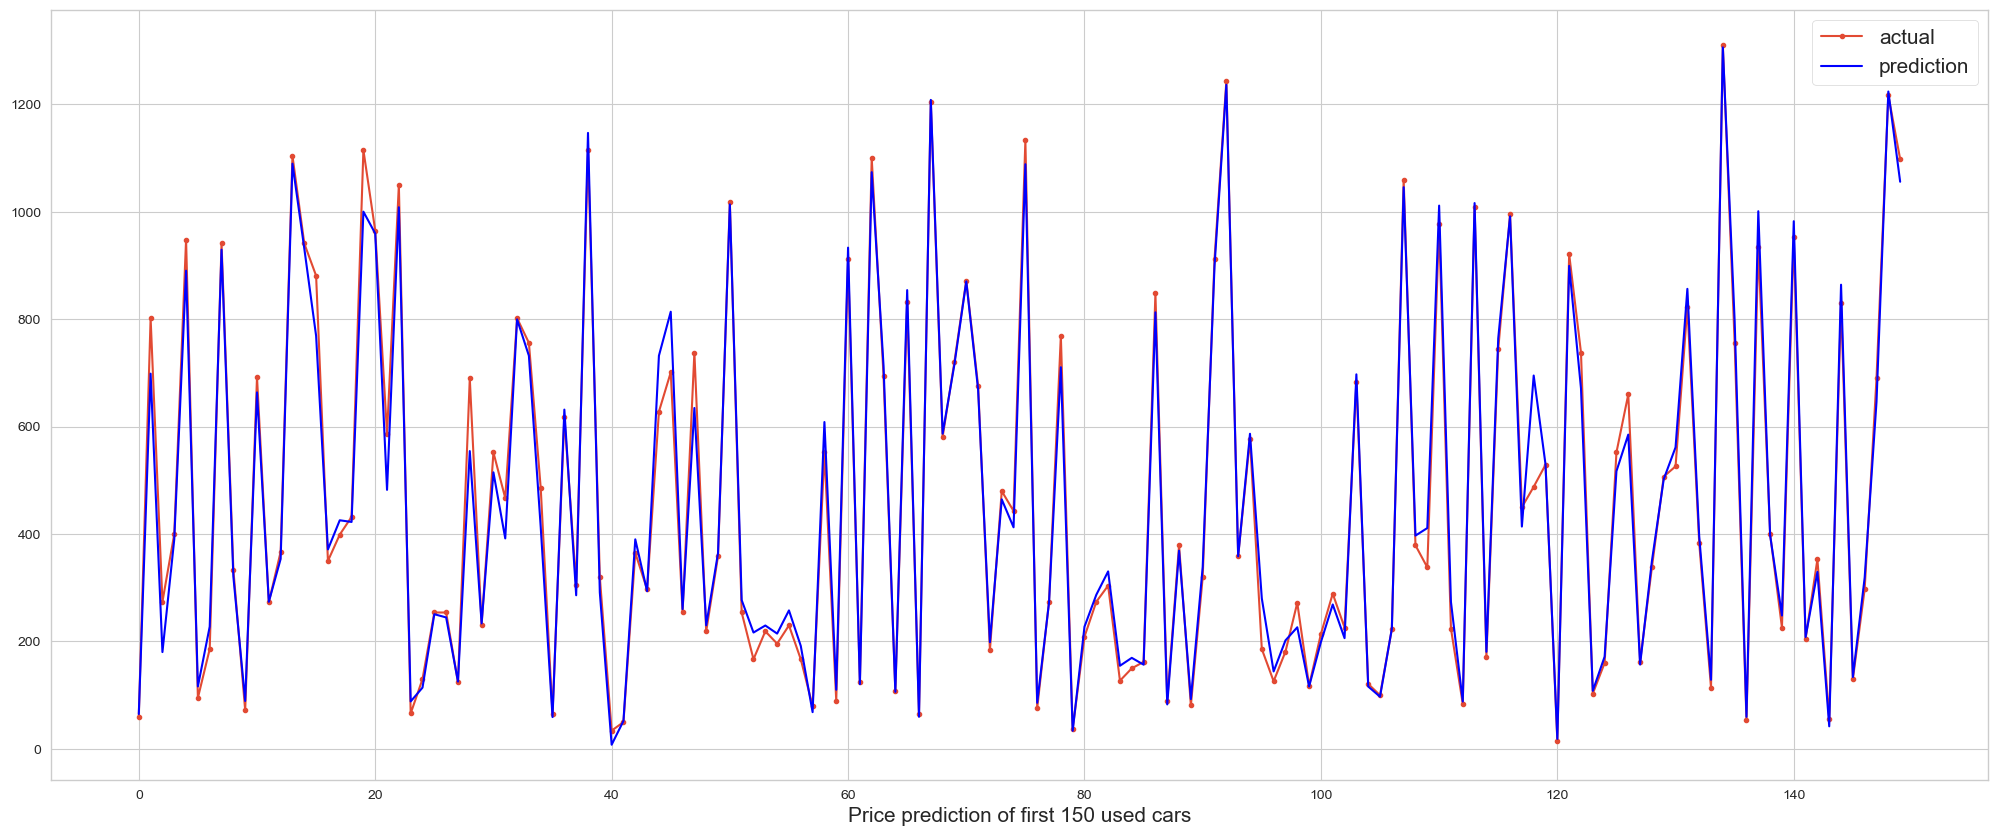

In [52]:
Graph_prediction(150, y_actual, y_predicted)

In [53]:
compare = pd.DataFrame({'Prediction': y_predicted, 'Test Data' : y_actual, 'Abs error': abs(y_actual - y_predicted), 'AAD%': abs(y_actual - y_predicted)/y_actual*100})
compare.head(10)

,Prediction,Test Data,Abs error,AAD%
0,64.987943,60,4.987943,8.313238
1,698.647158,802,103.352842,12.886888
2,180.308369,274,93.691631,34.194026
3,390.045724,400,9.954276,2.488569
4,890.317846,948,57.682154,6.084615
5,116.382825,95,21.382825,22.508237
6,227.781281,186,41.781281,22.463054
7,929.365739,941,11.634261,1.236372
8,320.976607,334,13.023393,3.899220
9,89.281981,72,17.281981,24.002752


In [54]:
model = GradientBoostingRegressor(random_state=21, n_estimators=5000)
feature1 = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
            'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']

X0 = df_test[feature1]
X, y = Definedata()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)
model.fit(X_train,y_train)
y_predicted = model.predict(X0)

submission = pd.DataFrame({'Car_id':test.index,'Price':y_predicted}) 
submission.head(10)

,Car_id,Price
0,0,229.220688
1,1,157.300412
2,2,933.110908
3,3,237.274792
4,4,273.766839
5,5,758.443125
6,6,1032.597871
7,7,122.656552
8,8,166.785100
9,9,751.605876


In [57]:
import pickle
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming you have a function Definedata() that returns X and y
X, y = Definedata()

# Define features
feature1 = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
            'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']

# Assuming df_test is your test dataset
X0 = df_test[feature1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

# Initialize and train the model
model = GradientBoostingRegressor(random_state=21, n_estimators=5000)
model.fit(X_train, y_train)

# Save the trained model as a pickle file
filename = 'gradient_boosting_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print('Saved model: ' + filename)

# Make predictions on the test dataset
y_predicted = model.predict(X0)

# Create a submission DataFrame
submission = pd.DataFrame({'Car_id': df_test.index, 'Price': y_predicted})
submission.head(10)


Saved model: gradient_boosting_model.pkl


,Car_id,Price
0,0,229.220688
1,1,157.300412
2,2,933.110908
3,3,237.274792
4,4,273.766839
5,5,758.443125
6,6,1032.597871
7,7,122.656552
8,8,166.785100
9,9,751.605876


In [58]:
import pickle

# Load the saved model
with open('gradient_boosting_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can inspect the loaded_model
print(loaded_model)


GradientBoostingRegressor(n_estimators=5000, random_state=21)


In [59]:
# Access the feature importances
feature_importances = loaded_model.feature_importances_
print("Feature Importances:", feature_importances)

# Access other model attributes or methods as needed


Feature Importances: [0.02498125 0.01225216 0.16571839 0.02026314 0.0105707  0.04657248
 0.00125696 0.00993135 0.11499893 0.58995617 0.00349847]


In [56]:
filename = 'Car_Price_prediction.csv'

submission.to_csv(filename,index=True)

print('Saved file: ' + filename)

Saved file: Car_Price_prediction.csv
